In [45]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [3]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('temperature-data', '*'))
temp_dir

['temperature-data/#008 2022-11-11 09_30_30 MST (Data MST).csv',
 'temperature-data/#041 2022-11-17 12_40_44 MST (Data MST).csv',
 'temperature-data/#035 2022-11-11 10_11_52 MST (Data MST).csv',
 'temperature-data/#019 July 2 2022(Data MDT).csv',
 'temperature-data/#037 2022-11-07 10_28_44 MST (Data MST).csv',
 'temperature-data/#011 2022-11-11 16_02_23 MST (Data MST).csv',
 'temperature-data/#020 2022-08-27 17_22_50 MDT (Data MDT).csv',
 'temperature-data/#006 2022-11-11 11_15_51 MST (Data MST).csv',
 'temperature-data/#009 2022-11-11 09_38_41 MST (Data MST).csv',
 'temperature-data/#004 2022-11-11 10_52_49 MST (Data MST).csv',
 'temperature-data/monthly_temps_env_vars_all.csv',
 'temperature-data/#022 2022-11-11 12_11_57 MST (Data MST).csv',
 'temperature-data/#027 2022-08-27 18_00_15 MDT (Data MDT).csv',
 'temperature-data/#018 2022-11-11 13_23_57 MST (Data MST).csv',
 'temperature-data/#025 2022-08-27 15_54_41 MDT (Data MDT).csv',
 'temperature-data/#036 2022-11-11 10_19_19 MST (Da

In [4]:
# Import one csv file.
def import_temp_csv(file_name):
    """
    Download an air temperature csv file.

    Function will allow a different csv file to be downloaded and edited to 
    required specifications.

    Paramterers.
    ----------
    file_name : str
      The name of the file.

    Returns
    --------
    Imported csv. 
        The requested and edited csv file.
    """
                                                                                                        
    # Read csv and make the date time column the index.
    downloaded_temp_csv = pd.read_csv(file_name,
                                      index_col='Date-Time (MST/MDT)',
                                      parse_dates=True)
    return downloaded_temp_csv


sensor_001 = import_temp_csv(
    'temperature-data/#001 2022-11-11 10_28_13 MST (Data MST).csv')
sensor_002 = import_temp_csv(
    'temperature-data/#002 2022-11-11 10_36_26 MST (Data MST).csv')
sensor_003 = import_temp_csv(
    'temperature-data/#003 2022-11-11 10_47_00 MST (Data MST).csv')
sensor_004 = import_temp_csv(
    'temperature-data/#004 2022-11-11 10_52_49 MST (Data MST).csv')
sensor_005 = import_temp_csv(
    'temperature-data/#005 2022-11-11 11_20_41 MST (Data MST).csv')
sensor_006 = import_temp_csv(
    'temperature-data/#006 2022-11-11 11_15_51 MST (Data MST).csv')
sensor_007 = import_temp_csv(
    'temperature-data/#007 2022-11-11 11_03_24 MST (Data MST).csv')
sensor_008 = import_temp_csv(
    'temperature-data/#008 2022-11-11 09_30_30 MST (Data MST).csv')
sensor_009 = import_temp_csv(
    'temperature-data/#009 2022-11-11 09_38_41 MST (Data MST).csv')
sensor_010 = import_temp_csv(
    'temperature-data/#010 2022-11-11 16_21_51 MST (Data MST).csv')
sensor_011 = import_temp_csv(
     'temperature-data/#011 2022-11-11 16_02_23 MST (Data MST).csv')
sensor_012 = import_temp_csv(
    'temperature-data/#012 2022-11-11 15_53_42 MST (Data MST).csv')
sensor_013 = import_temp_csv(
    'temperature-data/#013 2022-11-11 15_45_03 MST (Data MST).csv')
sensor_014 = import_temp_csv(
    'temperature-data/#014 2022-11-11 13_55_43 MST (Data MST).csv')
sensor_015 = import_temp_csv(
    'temperature-data/#015 2022-11-11 14_04_39 MST (Data MST).csv')
sensor_018 = import_temp_csv(
    'temperature-data/#018 2022-11-11 13_23_57 MST (Data MST).csv')
sensor_022 = import_temp_csv(
    'temperature-data/#022 2022-11-11 12_11_57 MST (Data MST).csv')
sensor_026 = import_temp_csv(
    'temperature-data/#026 2022-11-16 14_20_18 MST (Data MST).csv')
sensor_028 = import_temp_csv(
    'temperature-data/#028 2022-11-11 15_35_31 MST (Data MST).csv')
sensor_029 = import_temp_csv(
    'temperature-data/#029 2022-11-11 13_37_51 MST (Data MST).csv')
sensor_030 = import_temp_csv(
     'temperature-data/#030 2022-11-11 16_29_14 MST (Data MST).csv',)
sensor_031 = import_temp_csv(
    'temperature-data/#031 2022-11-11 10_02_58 MST (Data MST).csv')
sensor_035 = import_temp_csv(
    'temperature-data/#035 2022-11-11 10_11_52 MST (Data MST).csv')
sensor_036 = import_temp_csv(
    'temperature-data/#036 2022-11-11 10_19_19 MST (Data MST).csv')
sensor_037 = import_temp_csv(
     'temperature-data/#037 2022-11-07 10_28_44 MST (Data MST).csv')
sensor_039 =  import_temp_csv(
    'temperature-data/#039 2022-11-11 15_37_26 MST (Data MST).csv')
sensor_040 = import_temp_csv(
    'temperature-data/#040 2022-11-11 09_58_05 MST (Data MST).csv')
sensor_041 = import_temp_csv(
    'temperature-data/#041 2022-11-17 12_40_44 MST (Data MST).csv')
sensor_042 = import_temp_csv(
    'temperature-data/#042 2022-11-17 12_31_34 MST (Data MST).csv')
sensor_043 = import_temp_csv(
    'temperature-data/#043 2022-11-07 09_56_38 MST (Data MST).csv')

In [5]:
# Sensors that have a different file layout so create different function. 
def import_temp_csv_other(file_name):
    """
    Download an air temperature csv file.

    Function will allow a different csv file to be downloaded and edited to 
    required specifications.

    Paramterers.
    ----------
    file_name : str
      The name of the file.

    Returns
    --------
    Imported csv. 
        The requested and edited csv file.
    """
                                                                                                        
    # Read csv and make the date time column the index.
    downloaded_temp_csv = pd.read_csv(file_name,
                                      index_col='Date-Time (MDT)',
                                      parse_dates=True)
    return downloaded_temp_csv
sensor_016 = import_temp_csv_other(
    'temperature-data/#016 2022-08-27 17_01_13 MDT (Data MDT).csv')
sensor_017_unedited = import_temp_csv_other(
    'temperature-data/#017 .csv')
sensor_019a = import_temp_csv_other(
     'temperature-data/#019 July 2 2022(Data MDT).csv')
sensor_019b = import_temp_csv(
    'temperature-data/#019 replacement  2022-11-11 13_12_35 MST (Data MST)'
    '.csv')
sensor_019 = pd.concat([sensor_019a, sensor_019b], axis=0)
sensor_020 = import_temp_csv_other(
    'temperature-data/#020 2022-08-27 17_22_50 MDT (Data MDT).csv')
sensor_021 = import_temp_csv_other(
    'temperature-data/#021 2022-08-27 16_47_09 MDT (Data MDT).csv')
sensor_023 = import_temp_csv_other(
    'temperature-data/#023 2022-08-27 16_14_32 MDT (Data MDT).csv')
sensor_025 = import_temp_csv_other(
    'temperature-data/#025 2022-08-27 15_54_41 MDT (Data MDT).csv')
sensor_027 = import_temp_csv_other(
    'temperature-data/#027 2022-08-27 18_00_15 MDT (Data MDT).csv')

In [6]:
# Function to convert celsius to fahrenheit.
def celsius_to_fahr(temp_c):
    """Convert celsius to fahrenheit."""
    temp_fahr = (temp_c * 1.8) + 32
    return temp_fahr

In [7]:
# Create a function to edit imported csv.
def edit_imported_temp_csv(sensor_number):
    """Edit sensor data to the correct parameters."""
    # Delete unnecessary columns.
    sensor_number.drop(sensor_number.columns[[0, 2, 3]], axis=1, inplace=True)
    # Rename column headers.
    sensor_number.index.names = ['date_time']
    sensor_number.columns.values[0] = "temp_celsius"
    # Convert degrees celsius to degrees fahrenheit.
    sensor_number["temp_fahrenheit"] = celsius_to_fahr(
        sensor_number["temp_celsius"])
    # Remove temp_celsius column.
    sensor_number.drop(sensor_number.columns[[0]], axis=1, inplace=True)
    # Add in column to display the sensor number
    # sensor_number['sensor_name'] = name_of_sensor_df
    return sensor_number


edit_imported_temp_csv(sensor_001)
edit_imported_temp_csv(sensor_002)
edit_imported_temp_csv(sensor_003)
edit_imported_temp_csv(sensor_004)
edit_imported_temp_csv(sensor_005)
edit_imported_temp_csv(sensor_006)
edit_imported_temp_csv(sensor_007)
edit_imported_temp_csv(sensor_008)
edit_imported_temp_csv(sensor_009)
edit_imported_temp_csv(sensor_010)
edit_imported_temp_csv(sensor_011)
edit_imported_temp_csv(sensor_012)
edit_imported_temp_csv(sensor_013)
edit_imported_temp_csv(sensor_014)
edit_imported_temp_csv(sensor_015)
edit_imported_temp_csv(sensor_016)
#edit_imported_temp_csv(sensor_017)
edit_imported_temp_csv(sensor_018)
#edit_imported_temp_csv(sensor_019)
edit_imported_temp_csv(sensor_020)
edit_imported_temp_csv(sensor_021)
edit_imported_temp_csv(sensor_022)
edit_imported_temp_csv(sensor_023)
#edit_imported_temp_csv(sensor_024)
edit_imported_temp_csv(sensor_025)
edit_imported_temp_csv(sensor_026)
edit_imported_temp_csv(sensor_027)
edit_imported_temp_csv(sensor_028)
edit_imported_temp_csv(sensor_029)
edit_imported_temp_csv(sensor_030)
edit_imported_temp_csv(sensor_031)
#edit_imported_temp_csv(sensor_032)
#edit_imported_temp_csv(sensor_033)
#edit_imported_temp_csv(sensor_034)
edit_imported_temp_csv(sensor_035)
edit_imported_temp_csv(sensor_036)
edit_imported_temp_csv(sensor_037)
#edit_imported_temp_csv(sensor_038)
edit_imported_temp_csv(sensor_039)
edit_imported_temp_csv(sensor_040)
edit_imported_temp_csv(sensor_041)
edit_imported_temp_csv(sensor_042)
edit_imported_temp_csv(sensor_043)

temp_fahrenheit
date_time                           
2022-06-20 16:05:00           75.092
2022-06-20 16:10:00           75.776
2022-06-20 16:15:00           75.704
2022-06-20 16:20:00           75.470
2022-06-20 16:25:00           75.092
...                              ...
2022-11-07 09:35:00           44.420
2022-11-07 09:40:00           44.744
2022-11-07 09:45:00           44.348
2022-11-07 09:50:00           44.348
2022-11-07 09:54:21              NaN

[40259 rows x 1 columns]

In [8]:
#Sensor 17 and 19 need to be edited individually. 
# Edit sensor 17
sensor_017_unedited.index.name = 'date_time'
sensor_017_unedited.rename(columns={'Ch: 1 - Temperature   (°C )': 'temp_fahrenheit'}, inplace=True)
sensor_017_unedited['temp_fahrenheit'] = sensor_017_unedited['temp_fahrenheit'].apply(celsius_to_fahr)
sensor_017_unedited.drop(columns=['Host Connected', 'Low Power Warning', 'Button Down', 'Button Up', 'End of File'], inplace=True)
sensor_017 = sensor_017_unedited.drop("#", axis=1)
sensor_017

temp_fahrenheit
date_time                           
2022-05-26 08:00:00           71.690
2022-05-26 08:05:01           71.690
2022-05-26 08:10:02           71.762
2022-05-26 08:15:03           71.834
2022-05-26 08:20:04           71.996
...                              ...
2022-08-28 11:15:21           89.060
2022-08-28 11:20:22           89.600
2022-08-28 11:20:25              NaN
2022-08-28 11:20:26              NaN
2022-08-28 11:20:37              NaN

[27029 rows x 1 columns]

In [9]:
# Combine sensor 19 a and b 
sensor_019a = import_temp_csv_other(
     'temperature-data/#019 July 2 2022(Data MDT).csv')
sensor_019b = import_temp_csv(
    'temperature-data/#019 replacement  2022-11-11 13_12_35 MST (Data MST)'
    '.csv')
sensor_019 = pd.concat([sensor_019a, sensor_019b], axis=0)
sensor_019

#  Ch: 1 - Temperature   (°C) Host Connected  \
2022-05-26 00:05:00      1                       22.26            NaN   
2022-05-26 00:10:00      2                       22.22            NaN   
2022-05-26 00:15:00      3                       22.22            NaN   
2022-05-26 00:20:00      4                       22.18            NaN   
2022-05-26 00:25:00      5                       22.09            NaN   
...                    ...                         ...            ...   
2022-11-11 12:53:12  38045                         NaN            NaN   
2022-11-11 12:58:12  38046                         NaN            NaN   
2022-11-11 13:03:12  38047                         NaN            NaN   
2022-11-11 13:08:12  38048                         NaN            NaN   
2022-11-11 13:10:55  38049                         NaN         Logged   

                    End of File  Ch: 1 - Temperature   (°C )  \
2022-05-26 00:05:00         NaN                          NaN   
2022-05-26 00:10:00         NaN                          NaN   
2022-05-26 00:15:00         NaN                          NaN   
2022-05-26 00:20:00         NaN                          NaN   
2022-05-26 00:25:00         NaN                          NaN   
...                         ...                          ...   
2022-11-11 12:53:12         NaN                         0.51   
2022-11-11 12:58:12         NaN                         0.73   
2022-11-11 13:03:12         NaN                         0.73   
2022-11-11 13:08:12         NaN                         0.94   
2022-11-11 13:10:55      Logged                          NaN   

                     Ch: 2 - Light   (lux)  
2022-05-26 00:05:00                    NaN  
2022-05-26 00:10:00                    NaN  
2022-05-26 00:15:00                    NaN  
2022-05-26 00:20:00                    NaN  
2022-05-26 00:25:00                    NaN  
...                                    ...  
2022-11-11 12:53:12                  95.28  
2022-11-11 12:58:12                  97.04  
2022-11-11 13:03:12                  97.04  
2022-11-11 13:08:12                  97.88  
2022-11-11 13:10:55                    NaN  

[48844 rows x 6 columns]

In [10]:
# Edit Sensor 19 
# Combine the two temperature columns
sensor_019['temperature_c'] = sensor_019.iloc[:, [1, 4]].mean(axis=1).fillna(method='ffill')

# Drop the other columns
sensor_019.drop(sensor_019.columns[[0, 1, 2, 3, 4, 5]], axis=1, inplace=True)

# Convert the temperature to Fahrenheit
sensor_019['temperature_f'] = (sensor_019['temperature_c'] * 9/5) + 32

# Rename the temperature column
sensor_019.rename(columns={'temperature_c': 'Temperature (°C)', 'temperature_f': 'temp_fahrenheit'}, inplace=True)

#Drop the celcius column
sensor_019.drop(sensor_019.columns[[0]], axis=1, inplace=True)

# Rename index column
sensor_019.rename_axis("date_time", axis=0, inplace=True)
sensor_019

temp_fahrenheit
date_time                           
2022-05-26 00:05:00           72.068
2022-05-26 00:10:00           71.996
2022-05-26 00:15:00           71.996
2022-05-26 00:20:00           71.924
2022-05-26 00:25:00           71.762
...                              ...
2022-11-11 12:53:12           32.918
2022-11-11 12:58:12           33.314
2022-11-11 13:03:12           33.314
2022-11-11 13:08:12           33.692
2022-11-11 13:10:55           33.692

[48844 rows x 1 columns]

In [11]:
# Create a function for files so that each is by day and night 7 am to 10 pm
def day_night_temps(df, sensor_number):
    df.index = pd.to_datetime(df.index)
    df['Time of Day'] = 'Day'
    df.loc[(df.index.hour >= 22) | (df.index.hour <= 7), 'Time of Day'] = 'Night'
    df['sensor_number'] = sensor_number
    return df

In [12]:
# Add function to all files (adding new column with sensor number)
day_night_temps(sensor_001, 'sensor_001')
day_night_temps(sensor_002, 'sensor_002')
day_night_temps(sensor_003, 'sensor_003')
day_night_temps(sensor_004, 'sensor_004')
day_night_temps(sensor_005, 'sensor_005')
day_night_temps(sensor_006, 'sensor_006')
day_night_temps(sensor_007, 'sensor_007')
day_night_temps(sensor_009, 'sensor_009')
day_night_temps(sensor_010, 'sensor_010')
day_night_temps(sensor_011, 'sensor_011')
day_night_temps(sensor_012, 'sensor_012')
day_night_temps(sensor_013, 'sensor_013')
day_night_temps(sensor_014, 'sensor_014')
day_night_temps(sensor_015, 'sensor_015')
day_night_temps(sensor_016, 'sensor_016')
day_night_temps(sensor_017, 'sensor_017')
day_night_temps(sensor_018, 'sensor_018')
day_night_temps(sensor_019, 'sensor_019')
day_night_temps(sensor_020, 'sensor_020')
day_night_temps(sensor_021, 'sensor_021')
day_night_temps(sensor_022, 'sensor_022')
day_night_temps(sensor_023, 'sensor_023')
#day_night_temps(sensor_024, 'sensor_024')
day_night_temps(sensor_025, 'sensor_025')
day_night_temps(sensor_026, 'sensor_026')
day_night_temps(sensor_027, 'sensor_027')
day_night_temps(sensor_028, 'sensor_028')
day_night_temps(sensor_029, 'sensor_029')
day_night_temps(sensor_030, 'sensor_030')
day_night_temps(sensor_031, 'sensor_031')
#day_night_temps(sensor_032, 'sensor_032')
#day_night_temps(sensor_033, 'sensor_033')
#day_night_temps(sensor_034, 'sensor_034')
day_night_temps(sensor_035, 'sensor_035')
day_night_temps(sensor_036, 'sensor_036')
day_night_temps(sensor_037, 'sensor_037')
#day_night_temps(sensor_038, 'sensor_038')
day_night_temps(sensor_039, 'sensor_039')
day_night_temps(sensor_040, 'sensor_040')
day_night_temps(sensor_041, 'sensor_042')
day_night_temps(sensor_043, 'sensor_043')

temp_fahrenheit Time of Day sensor_number
date_time                                                     
2022-06-20 16:05:00           75.092         Day    sensor_043
2022-06-20 16:10:00           75.776         Day    sensor_043
2022-06-20 16:15:00           75.704         Day    sensor_043
2022-06-20 16:20:00           75.470         Day    sensor_043
2022-06-20 16:25:00           75.092         Day    sensor_043
...                              ...         ...           ...
2022-11-07 09:35:00           44.420         Day    sensor_043
2022-11-07 09:40:00           44.744         Day    sensor_043
2022-11-07 09:45:00           44.348         Day    sensor_043
2022-11-07 09:50:00           44.348         Day    sensor_043
2022-11-07 09:54:21              NaN         Day    sensor_043

[40259 rows x 3 columns]

In [13]:
# Combine all of the files that have been sorted into night and day into one and concat. 
nightday_list = (sensor_001,
sensor_002,
sensor_003,
sensor_004,
sensor_005,
sensor_006,
sensor_007,
sensor_008,
sensor_009,
sensor_010,
sensor_011,
sensor_012,
sensor_013,
sensor_014,
sensor_015,
sensor_016,
sensor_017,
sensor_018,
sensor_019,
sensor_020,
sensor_021,
sensor_022,
sensor_023,
#sensor_024,
sensor_025,
sensor_026,
sensor_027,
sensor_028,
sensor_029,
sensor_030,
sensor_031,
#sensor_032,
#sensor_033,
#sensor_034,
sensor_035,
sensor_036,
sensor_037,
#sensor_038,
sensor_039,
sensor_040,
sensor_041,
sensor_042,
sensor_043)
nightday_df= pd.concat(nightday_list)
#nightday_df = nightday_df_unedit.drop(columns=['End of File'])
#nightday_df
#nightday_df
nightday_df

temp_fahrenheit Time of Day sensor_number
date_time                                                     
2022-05-26 08:00:00           60.188         Day    sensor_001
2022-05-26 08:05:00           63.806         Day    sensor_001
2022-05-26 08:10:00           64.112         Day    sensor_001
2022-05-26 08:11:09              NaN         Day    sensor_001
2022-05-26 08:15:00           63.734         Day    sensor_001
...                              ...         ...           ...
2022-11-07 09:35:00           44.420         Day    sensor_043
2022-11-07 09:40:00           44.744         Day    sensor_043
2022-11-07 09:45:00           44.348         Day    sensor_043
2022-11-07 09:50:00           44.348         Day    sensor_043
2022-11-07 09:54:21              NaN         Day    sensor_043

[1637241 rows x 3 columns]

In [14]:
# Load the installation dates CSV into a DataFrame
installation_dates = pd.read_csv('temperature-data/installation_dates_per_sensor_summer_2022.csv',
                                 index_col='Installation_date',
                                 parse_dates=True)
installation_dates = installation_dates.reset_index()
installation_dates

Installation_date sensor_number
0         2022-05-26    sensor_001
1         2022-05-26    sensor_002
2         2022-05-26    sensor_003
3         2022-05-26    sensor_004
4         2022-05-26    sensor_005
5         2022-05-26    sensor_006
6         2022-05-26    sensor_007
7         2022-05-26    sensor_008
8         2022-05-26    sensor_009
9         2022-05-26    sensor_010
10        2022-05-26    sensor_011
11        2022-05-26    sensor_012
12        2022-05-26    sensor_013
13        2022-05-26    sensor_014
14        2022-05-26    sensor_015
15        2022-06-03    sensor_016
16        2022-06-16    sensor_017
17        2022-05-26    sensor_018
18        2022-05-26    sensor_019
19        2022-05-26    sensor_020
20        2022-05-26    sensor_021
21        2022-05-26    sensor_022
22        2022-05-26    sensor_023
23        2022-05-26    sensor_024
24        2022-05-26    sensor_025
25        2022-05-27    sensor_026
26        2022-06-03    sensor_027
27        2022-06-16    sensor_028
28        2022-06-16    sensor_029
29        2022-06-16    sensor_030
30        2022-06-16    sensor_031
31        2022-06-14    sensor_032
32        2022-06-14    sensor_033
33        2022-06-14    sensor_034
34        2022-06-16    sensor_035
35        2022-06-16    sensor_036
36        2022-06-15    sensor_037
37        2022-06-15    sensor_038
38        2022-06-16    sensor_039
39        2022-06-16    sensor_040
40        2022-06-24    sensor_041
41        2022-06-25    sensor_042
42        2022-06-25    sensor_043

In [15]:
# Add one day one installed dates

# add one day to the index and assign to new column 'day_added'
installation_dates['day_added'] = installation_dates['Installation_date'] + pd.Timedelta(days=1)

# set day_added column as the new index
installation_dates.set_index('day_added', inplace=True)

# show the updated dataframe
installation_dates

installation_dates = installation_dates.reset_index()

installation_dates

day_added Installation_date sensor_number
0  2022-05-27        2022-05-26    sensor_001
1  2022-05-27        2022-05-26    sensor_002
2  2022-05-27        2022-05-26    sensor_003
3  2022-05-27        2022-05-26    sensor_004
4  2022-05-27        2022-05-26    sensor_005
5  2022-05-27        2022-05-26    sensor_006
6  2022-05-27        2022-05-26    sensor_007
7  2022-05-27        2022-05-26    sensor_008
8  2022-05-27        2022-05-26    sensor_009
9  2022-05-27        2022-05-26    sensor_010
10 2022-05-27        2022-05-26    sensor_011
11 2022-05-27        2022-05-26    sensor_012
12 2022-05-27        2022-05-26    sensor_013
13 2022-05-27        2022-05-26    sensor_014
14 2022-05-27        2022-05-26    sensor_015
15 2022-06-04        2022-06-03    sensor_016
16 2022-06-17        2022-06-16    sensor_017
17 2022-05-27        2022-05-26    sensor_018
18 2022-05-27        2022-05-26    sensor_019
19 2022-05-27        2022-05-26    sensor_020
20 2022-05-27        2022-05-26    sensor_021
21 2022-05-27        2022-05-26    sensor_022
22 2022-05-27        2022-05-26    sensor_023
23 2022-05-27        2022-05-26    sensor_024
24 2022-05-27        2022-05-26    sensor_025
25 2022-05-28        2022-05-27    sensor_026
26 2022-06-04        2022-06-03    sensor_027
27 2022-06-17        2022-06-16    sensor_028
28 2022-06-17        2022-06-16    sensor_029
29 2022-06-17        2022-06-16    sensor_030
30 2022-06-17        2022-06-16    sensor_031
31 2022-06-15        2022-06-14    sensor_032
32 2022-06-15        2022-06-14    sensor_033
33 2022-06-15        2022-06-14    sensor_034
34 2022-06-17        2022-06-16    sensor_035
35 2022-06-17        2022-06-16    sensor_036
36 2022-06-16        2022-06-15    sensor_037
37 2022-06-16        2022-06-15    sensor_038
38 2022-06-17        2022-06-16    sensor_039
39 2022-06-17        2022-06-16    sensor_040
40 2022-06-25        2022-06-24    sensor_041
41 2022-06-26        2022-06-25    sensor_042
42 2022-06-26        2022-06-25    sensor_043

In [ ]:
# Use the day after installation date 
monthly_means_subset = pd.read_csv('temperature-data/monthly_means_subset.csv',
                                   index_col='Date_Time',
                                   parse_dates=True)
monthly_means_subset.head()

In [ ]:
monthly_means_subset.info()

In [ ]:
# Change time to 10 pm from 

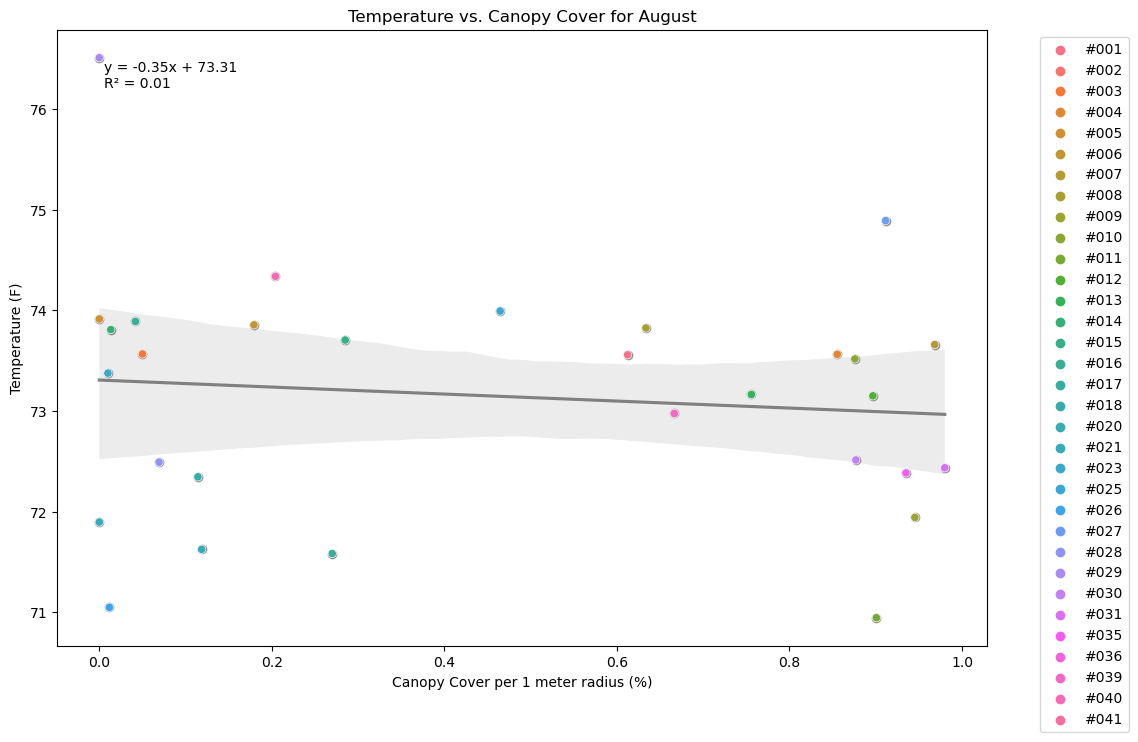

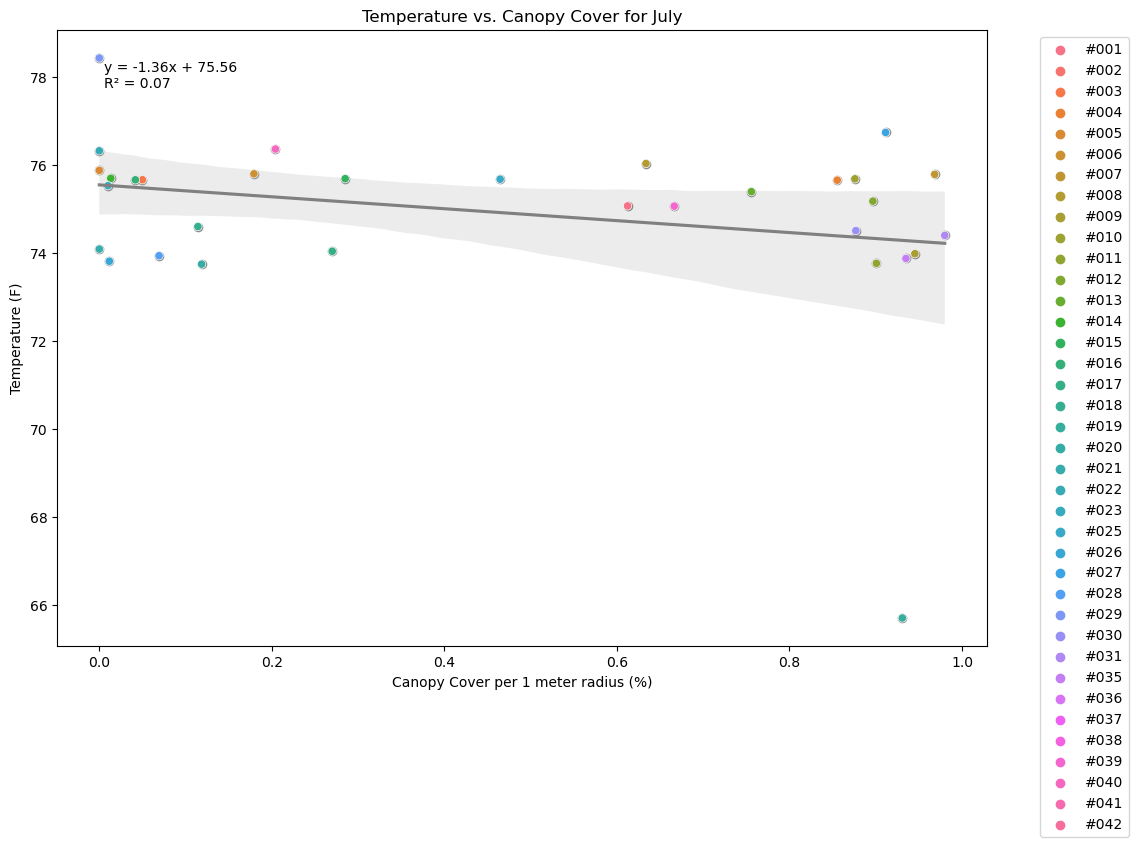

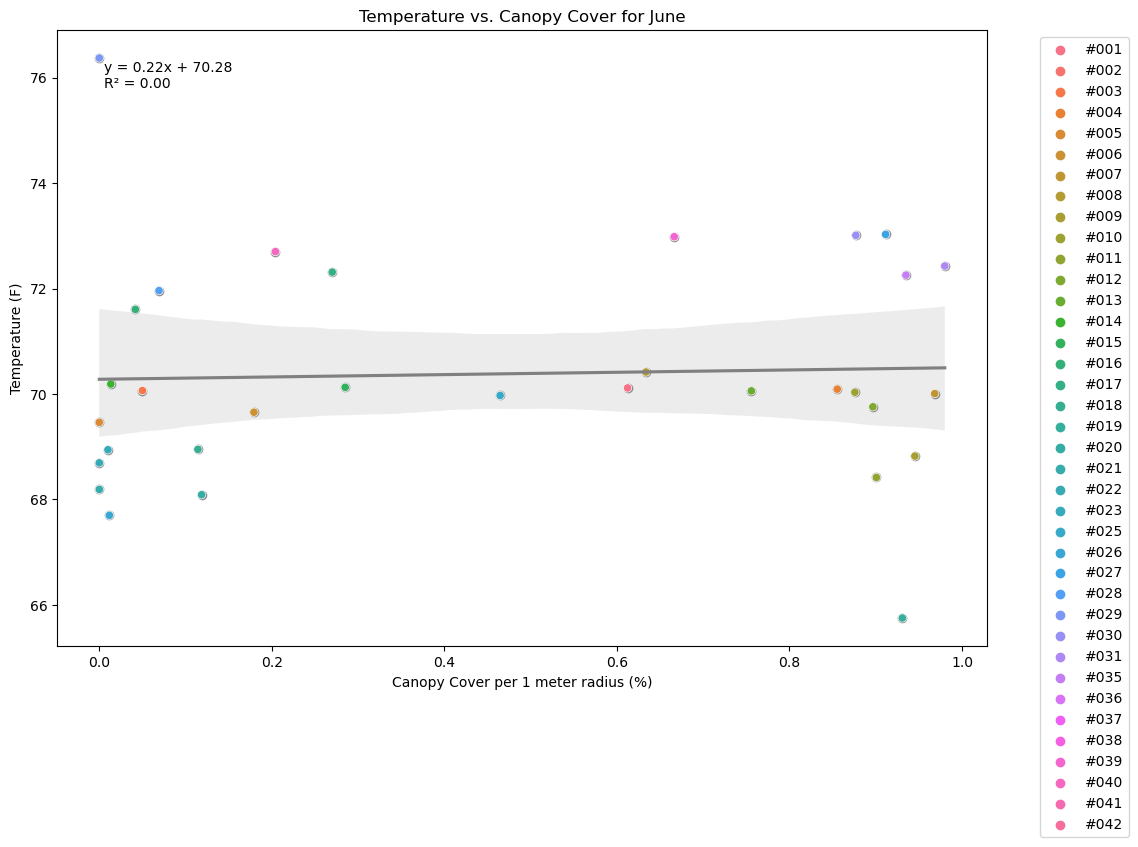

In [56]:
# Plotting by canopy cover radius - 1 meter 
# Group the data by month and ID
grouped = monthly_means_subset.groupby(['Month', 'ID']).mean().reset_index()

# Create a scatter plot for each month
for month in grouped['Month'].unique():
    
    # Set the figure size
    fig, ax = plt.subplots(figsize=(12, 8))

    # Subset the data for the current month
    subset = grouped[grouped['Month'] == month]
    
    # Add a linear regression line to the plot
    sns.regplot(data=subset, x='Canopy_percent_cover_1m', y='Temp_F', color='grey')
    
    # Create a scatter plot for temperature vs. canopy cover
    sns.scatterplot(data=subset, x='Canopy_percent_cover_1m', y='Temp_F', hue='ID')
    
    # Add the linear regression equation and r squared value
    x = subset['Canopy_percent_cover_1m']
    y = subset['Temp_F']
    mask = (~np.isnan(x)) & (~np.isnan(y))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
    plt.text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}',
         transform=ax.transAxes, fontsize=10, va='top')

    # Set the plot title and axis labels
    plt.title(f'Temperature vs. Canopy Cover for {month}')
    plt.xlabel('Canopy Cover per 1 meter radius (%)')
    plt.ylabel('Temperature (F)')
    
    # Move the legend off to the side
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show the plot
    plt.show()


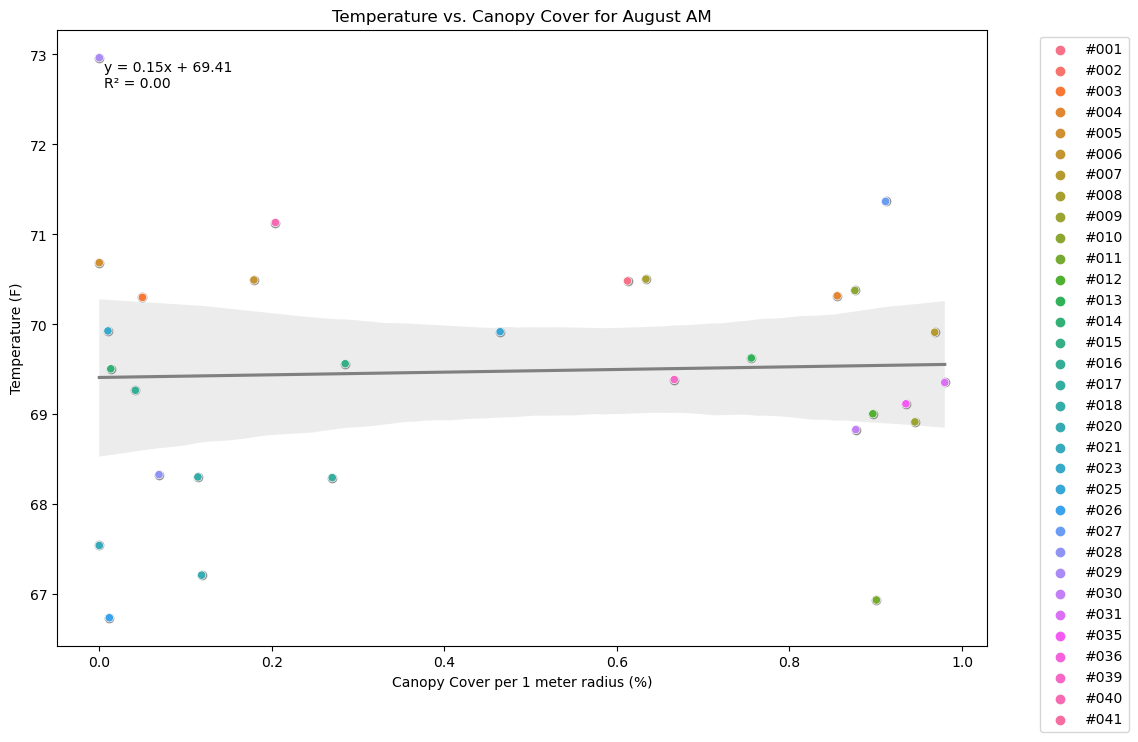

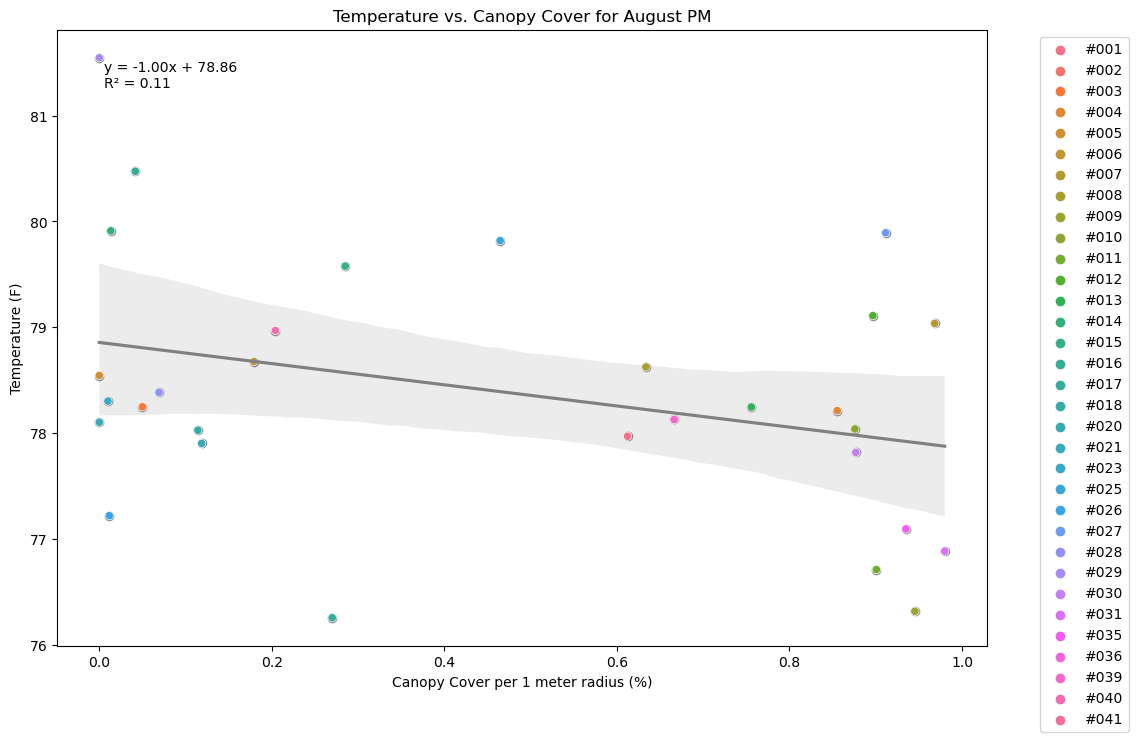

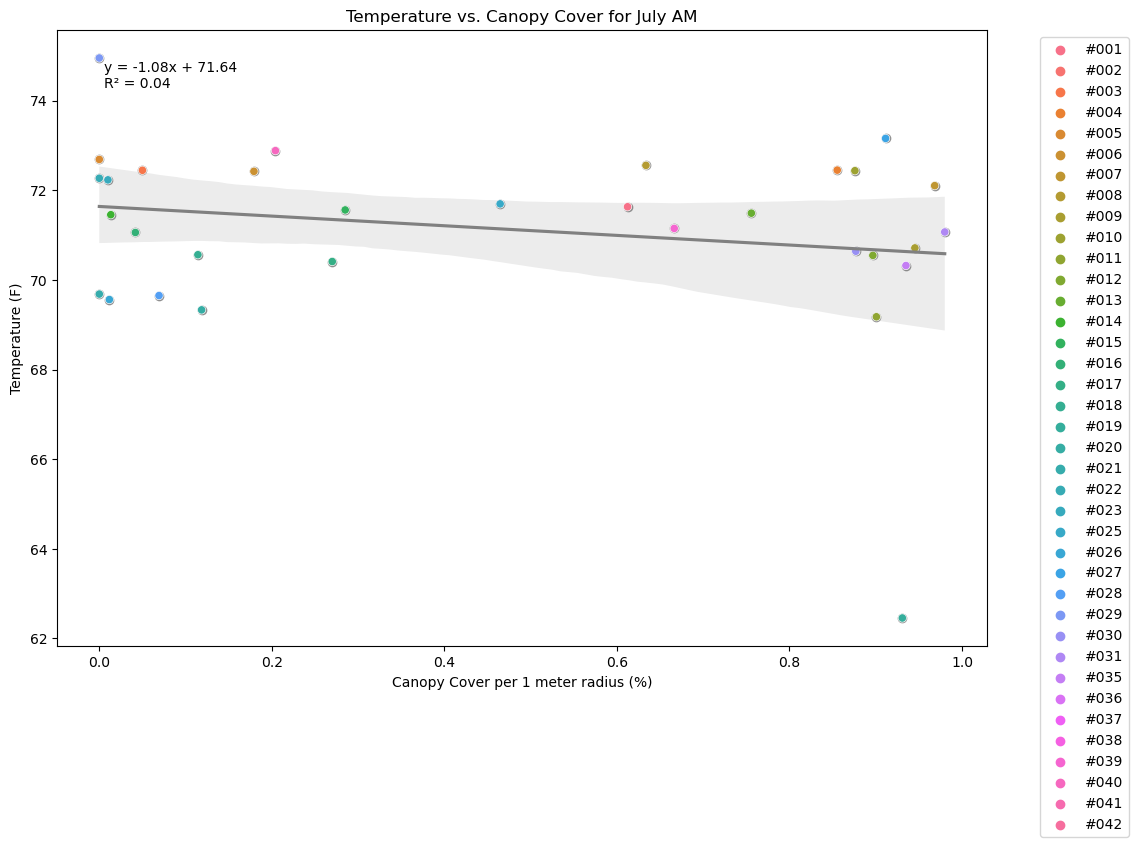

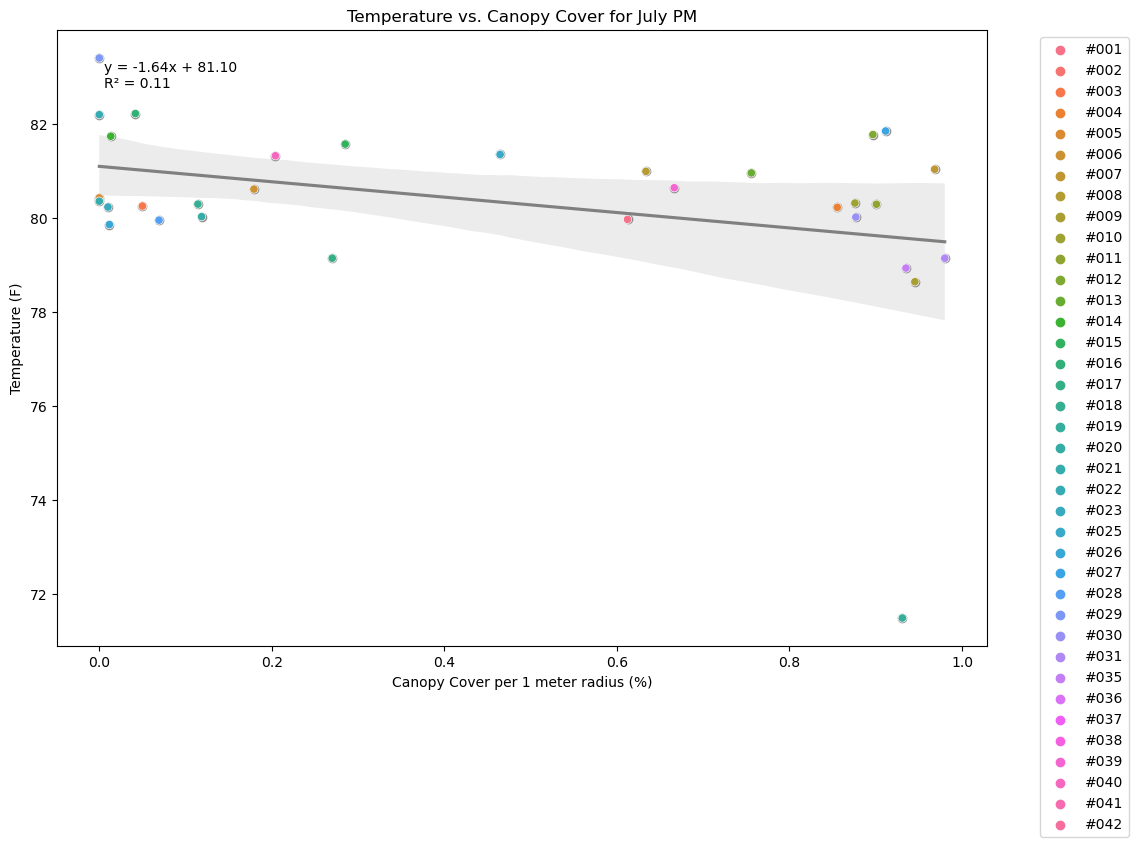

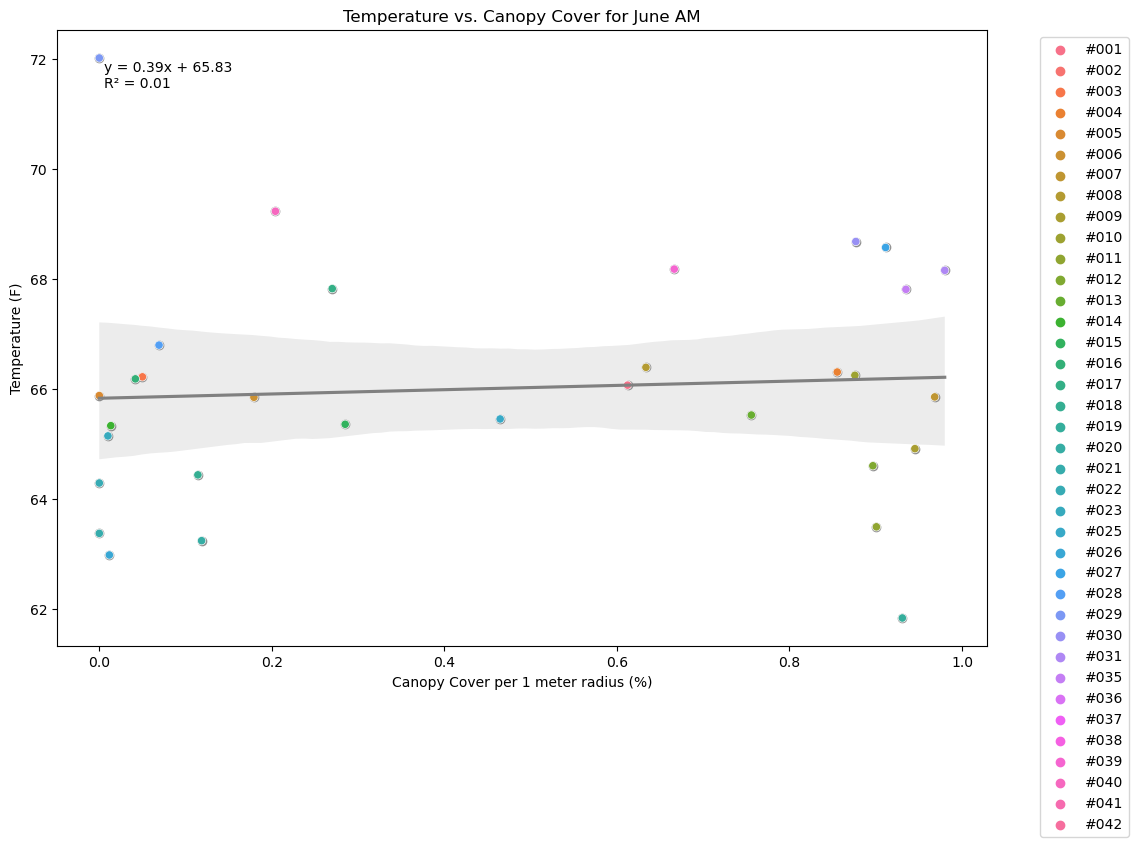

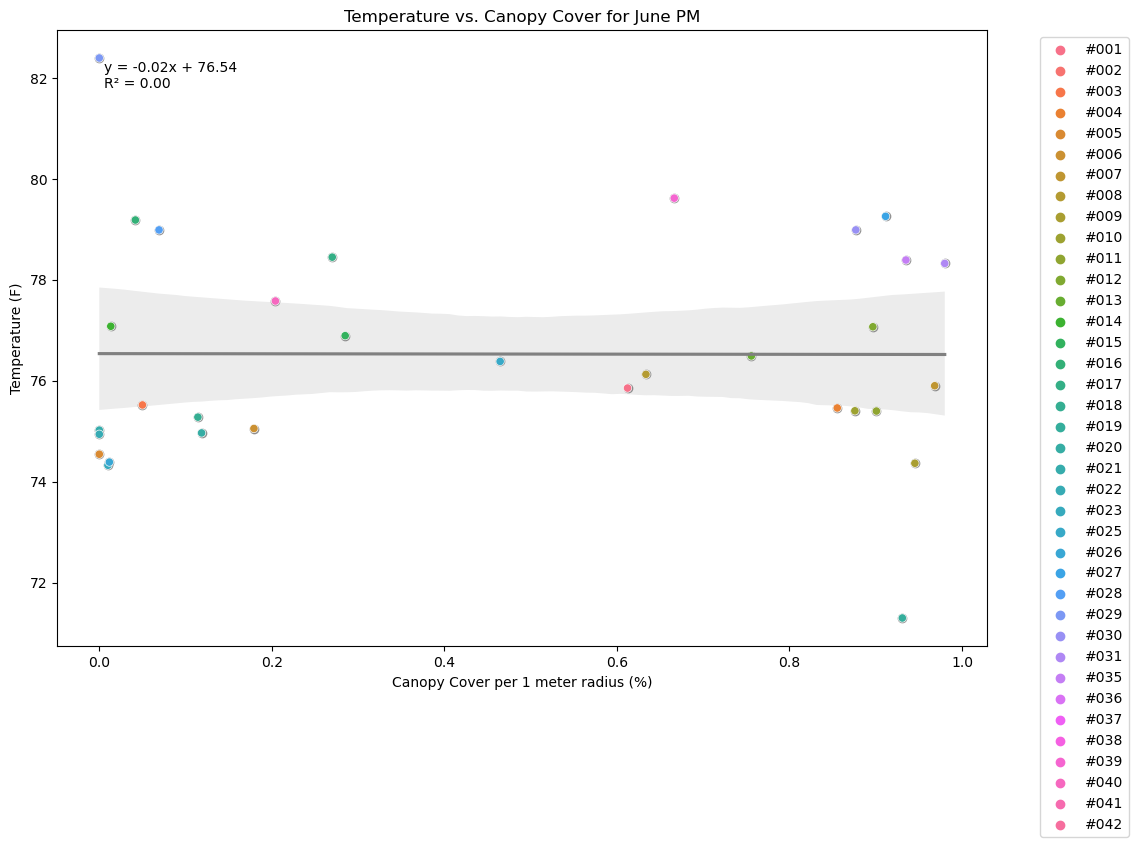

In [57]:
# Plotting by canopy cover radius - 1 meter - AM and PM
# Group the data by month, ID, and period
grouped = monthly_means_subset.groupby(['Month', 'ID', 'period']).mean().reset_index()

# Create a scatter plot for each month and period
for month in grouped['Month'].unique():
    for period in grouped['period'].unique():
    
        # Set the figure size
        fig, ax = plt.subplots(figsize=(12, 8))

        # Subset the data for the current month and period
        subset = grouped[(grouped['Month'] == month) & (grouped['period'] == period)]
        
        # Add a linear regression line to the plot
        sns.regplot(data=subset, x='Canopy_percent_cover_1m', y='Temp_F', color='grey')
        
        # Create a scatter plot for temperature vs. canopy cover
        sns.scatterplot(data=subset, x='Canopy_percent_cover_1m', y='Temp_F', hue='ID')
        
        # Add the linear regression equation and r squared value
        x = subset['Canopy_percent_cover_1m']
        y = subset['Temp_F']
        mask = (~np.isnan(x)) & (~np.isnan(y))
        slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
        plt.text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}',
             transform=ax.transAxes, fontsize=10, va='top')

        # Set the plot title and axis labels
        plt.title(f'Temperature vs. Canopy Cover for {month} {period}')
        plt.xlabel('Canopy Cover per 1 meter radius (%)')
        plt.ylabel('Temperature (F)')
        
        # Move the legend off to the side
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Show the plot
        plt.show()


In [19]:
# Add in cc/ic values for each sensor. 
sensor_mapping = {'sensor_001': ('0.363728', '30.47213', '22.0', '25'),
                  'sensor_002': ('0.439855', '25.91392', '22.0', '60'),
                  'sensor_003': ('0.11662', '13.43474', '21.0', '0'),
                  'sensor_004': ('0.508461', '46.65613', '22.0', '40'),
                  'sensor_005': ('0.05995', '0.014293', '71.0', '0'),
                  'sensor_006': ('0.511842', '1.829587', '21.0', '0'),
                  'sensor_007': ('0.383916', '24.93221', '22.0', '0'),
                  'sensor_008': ('0.567748', '27.95649', '22.0', '20'),
                  'sensor_009': ('0.000617', '34.08161', '21.0', '97'),
                  'sensor_010': ('0.605514', '17.04978', '22.0', '40'),
                  'sensor_011': ('0.042766', '31.94138', '21.0', '90'),
                  'sensor_012': ('0.757661', '21.82697', '23.0', '85'),
                  'sensor_013': ('0.291928', '31.11972', '21.0', '10'),
                  'sensor_014': ('0.809408', '3.237618', '23.0', '40'),
                  'sensor_015': ('0.841339', '17.11473', '23.0', '80'),
                  'sensor_016': ('0.647314', '3.271501', '23.0', '0'),
                  'sensor_017': ('0.634154', '18.2559', '22.0', '25'),
                  'sensor_018': ('0.124444', '17.03382', '21.0', '90'),
                  'sensor_019': ('0', '66.60774', '71.0', '95'),
                  'sensor_020': ('0.586828', '2.115719', '22.0', '20'),
                  'sensor_021': ('0', '4.175624', '71.0', '0'),
                  'sensor_022': ('0', '0.010112', '71.0', '0'),
                  'sensor_023': ('0', '5.127098', '71.0', '40'),
                  'sensor_024': ('0.466056', '17.9913', '23.0', '10'),
                  'sensor_025': ('0.771531', '6.008971', '22.0', '50'),
                  'sensor_026': ('0', '2.7959', '21.0', 'NA'),
                  'sensor_027': ('0.771806', '13.79064', '23.0', '60'),
                  'sensor_028': ('0.029553', '48.08899', '21.0', '20'),
                  'sensor_029': ('0.971162', '0.515856', '23.0', '75'),
                  'sensor_030': ('0.031343', '29.19479', '11.0', '40'),
                  'sensor_031': ('0.371363', '42.60595', '22.0', '98'),
                  'sensor_032': ('0', '48', '42.0', 'NA'),
                  'sensor_033': ('0', '27', '42.0', 'NA'),
                  'sensor_034': ('0', '28', '42.0', 'NA'),
                  'sensor_035': ('0.094898', '80.67614', '21.0', '80'),
                  'sensor_036': ('0.16951', '21', '22.0', '25'),
                  'sensor_037': ('0', '10', '52.0', 'NA'),
                  'sensor_038': ('0.337788', '42', '21.0', 'NA'),
                  'sensor_039': ('0.052344', '48.90122', '22.0', '30'),
                  'sensor_040': ('0.514811', '27.33316', '22.0', '30'),
                  'sensor_041': ('0', '37', '90.0', 'NA'),
                  'sensor_042': ('0.267038', '30', '90.0', 'NA'),
                  'sensor_043': ('0.526808', '33.27364', '22.0', 'NA'),
                 }

for sensor_number, (ic_value, cc_value, lulc_value, cc_densi_value) in sensor_mapping.items():
    if cc_densi_value == 'NA':
        cc_densi_value = np.nan
    nightday_df.loc[nightday_df['sensor_number'] == sensor_number, 'ic_per_30'] = float(ic_value)
    nightday_df.loc[nightday_df['sensor_number'] == sensor_number, 'cc_per_30'] = float(cc_value)
    nightday_df.loc[nightday_df['sensor_number'] == sensor_number, 'LULC'] = float(lulc_value)
    nightday_df.loc[nightday_df['sensor_number'] == sensor_number, 'cc_per_densi'] = float(cc_densi_value)

nightday_df['cc_per_30'] = nightday_df['cc_per_30'].astype(float)
nightday_df['ic_per_30'] = nightday_df['ic_per_30'].astype(float)
nightday_df['LULC'] = nightday_df['LULC'].astype(float)
nightday_df['cc_per_densi']=nightday_df['cc_per_densi'].astype(float)
nightday_df

temp_fahrenheit Time of Day sensor_number  ic_per_30  \
date_time                                                                   
2022-05-26 08:00:00           60.188         Day    sensor_001   0.363728   
2022-05-26 08:05:00           63.806         Day    sensor_001   0.363728   
2022-05-26 08:10:00           64.112         Day    sensor_001   0.363728   
2022-05-26 08:11:09              NaN         Day    sensor_001   0.363728   
2022-05-26 08:15:00           63.734         Day    sensor_001   0.363728   
...                              ...         ...           ...        ...   
2022-11-07 09:35:00           44.420         Day    sensor_043   0.526808   
2022-11-07 09:40:00           44.744         Day    sensor_043   0.526808   
2022-11-07 09:45:00           44.348         Day    sensor_043   0.526808   
2022-11-07 09:50:00           44.348         Day    sensor_043   0.526808   
2022-11-07 09:54:21              NaN         Day    sensor_043   0.526808   

                     cc_per_30  LULC  cc_per_densi  
date_time                                           
2022-05-26 08:00:00   30.47213  22.0          25.0  
2022-05-26 08:05:00   30.47213  22.0          25.0  
2022-05-26 08:10:00   30.47213  22.0          25.0  
2022-05-26 08:11:09   30.47213  22.0          25.0  
2022-05-26 08:15:00   30.47213  22.0          25.0  
...                        ...   ...           ...  
2022-11-07 09:35:00   33.27364  22.0           NaN  
2022-11-07 09:40:00   33.27364  22.0           NaN  
2022-11-07 09:45:00   33.27364  22.0           NaN  
2022-11-07 09:50:00   33.27364  22.0           NaN  
2022-11-07 09:54:21   33.27364  22.0           NaN  

[1637241 rows x 7 columns]

In [20]:
# Get the mean, min, and max of each sensor by month and night/day. 
nightday_df['month'] = nightday_df.index.to_period('M')
nightday_agg_no_index = nightday_df.groupby([nightday_df['sensor_number'],
                                             nightday_df['Time of Day'],
                                             nightday_df['month'],
                                             nightday_df['ic_per_30'],
                                             nightday_df['LULC'],
                                             nightday_df['cc_per_densi'],
                                             nightday_df['cc_per_30']]).agg({'temp_fahrenheit': ['mean', 'min', 'max']})
nightday_agg_no = nightday_agg_no_index.reset_index()
#nightday_agg = nightday_agg_no.groupby(["sensor_number","Time of Day","month","ic_per_30","cc_per_30"])["temp_fahrenheit"].agg(["mean","min","max"]).unstack()
nightday_agg_no['cc_per_30m']=nightday_agg_no['cc_per_30'].astype(float)
nightday_agg_no['ic_per_30m']=nightday_agg_no['ic_per_30'].astype(float)

nightday_agg = nightday_agg_no.reset_index()
# # ######nightday_agg = nightday_agg_index_no.drop(columns='index')
nightday_agg
nightday_agg['cc_per_30'] = pd.to_numeric(nightday_agg['cc_per_30'], errors='coerce')
nightday_agg['ic_per_30'] = pd.to_numeric(nightday_agg['ic_per_30'], errors='coerce')
nightday_agg

index sensor_number Time of Day    month ic_per_30  LULC cc_per_densi  \
                                                                            
0       0    sensor_001         Day  2022-05  0.363728  22.0         25.0   
1       1    sensor_001         Day  2022-06  0.363728  22.0         25.0   
2       2    sensor_001         Day  2022-07  0.363728  22.0         25.0   
3       3    sensor_001         Day  2022-08  0.363728  22.0         25.0   
4       4    sensor_001         Day  2022-09  0.363728  22.0         25.0   
..    ...           ...         ...      ...       ...   ...          ...   
385   385    sensor_040       Night  2022-07  0.514811  22.0         30.0   
386   386    sensor_040       Night  2022-08  0.514811  22.0         30.0   
387   387    sensor_040       Night  2022-09  0.514811  22.0         30.0   
388   388    sensor_040       Night  2022-10  0.514811  22.0         30.0   
389   389    sensor_040       Night  2022-11  0.514811  22.0         30.0   

    cc_per_30 temp_fahrenheit                 cc_per_30m ic_per_30m  
                         mean     min     max                        
0    30.47213       66.871357  43.808  88.592   30.47213   0.363728  
1    30.47213       75.434525  43.034  99.644   30.47213   0.363728  
2    30.47213       79.832429  59.414  97.016   30.47213   0.363728  
3    30.47213       77.851972  60.332  94.388   30.47213   0.363728  
4    30.47213       71.813543  46.598  94.010   30.47213   0.363728  
..        ...             ...     ...     ...        ...        ...  
385  27.33316       67.296761  54.392  85.352   27.33316   0.514811  
386  27.33316       66.413852  55.400  80.096   27.33316   0.514811  
387  27.33316       59.499595  41.576  78.332   27.33316   0.514811  
388  27.33316       45.961308  32.234  64.274   27.33316   0.514811  
389  27.33316       36.771789  17.006  54.392   27.33316   0.514811  

[390 rows x 13 columns]

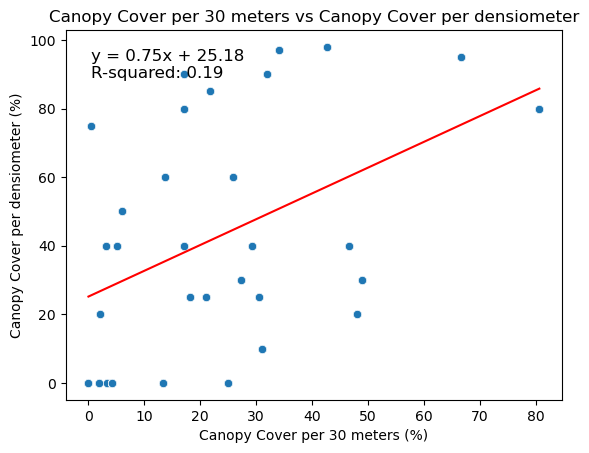

In [21]:
# Plot canopy cover per 30 meters by cc per densiometer
# create a dataframe with only the columns we need
cc_df = nightday_agg[['cc_per_30', 'cc_per_densi']].dropna()

# create a scatter plot of cc_per_30 vs cc_per_densi
sns.scatterplot(x='cc_per_30', y='cc_per_densi', data=cc_df)

# calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(cc_df['cc_per_30'], cc_df['cc_per_densi'])
x_values = np.array([cc_df['cc_per_30'].min(), cc_df['cc_per_30'].max()])
y_values = intercept + slope * x_values

# add the linear regression line to the plot
sns.lineplot(x=x_values, y=y_values, color='red')

# add labels and a title to the plot
plt.xlabel('Canopy Cover per 30 meters (%)')
plt.ylabel('Canopy Cover per densiometer (%)')
plt.title('Canopy Cover per 30 meters vs Canopy Cover per densiometer')

# add slope and R-squared annotations
textstr = f'y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

#plt.savefig('cc_compared.pdf')
plt.show()

In [22]:
nightday_df = nightday_df.reset_index()
nightday_df

date_time  temp_fahrenheit Time of Day sensor_number  \
0       2022-05-26 08:00:00           60.188         Day    sensor_001   
1       2022-05-26 08:05:00           63.806         Day    sensor_001   
2       2022-05-26 08:10:00           64.112         Day    sensor_001   
3       2022-05-26 08:11:09              NaN         Day    sensor_001   
4       2022-05-26 08:15:00           63.734         Day    sensor_001   
...                     ...              ...         ...           ...   
1637236 2022-11-07 09:35:00           44.420         Day    sensor_043   
1637237 2022-11-07 09:40:00           44.744         Day    sensor_043   
1637238 2022-11-07 09:45:00           44.348         Day    sensor_043   
1637239 2022-11-07 09:50:00           44.348         Day    sensor_043   
1637240 2022-11-07 09:54:21              NaN         Day    sensor_043   

         ic_per_30  cc_per_30  LULC  cc_per_densi    month  
0         0.363728   30.47213  22.0          25.0  2022-05  
1         0.363728   30.47213  22.0          25.0  2022-05  
2         0.363728   30.47213  22.0          25.0  2022-05  
3         0.363728   30.47213  22.0          25.0  2022-05  
4         0.363728   30.47213  22.0          25.0  2022-05  
...            ...        ...   ...           ...      ...  
1637236   0.526808   33.27364  22.0           NaN  2022-11  
1637237   0.526808   33.27364  22.0           NaN  2022-11  
1637238   0.526808   33.27364  22.0           NaN  2022-11  
1637239   0.526808   33.27364  22.0           NaN  2022-11  
1637240   0.526808   33.27364  22.0           NaN  2022-11  

[1637241 rows x 9 columns]

In [23]:
# Dataframe with daily max avg across month
# create a new column with just the month
nightday_df['month'] = nightday_df['date_time'].dt.month

# group the data by month, time of day, and sensor number
grouped = nightday_df.groupby(['month', 'Time of Day', 'sensor_number', 'date_time'])

# # resample the data to daily frequency and get the daily maximum temperature for each sensor
daily_max = nightday_df.set_index('date_time').groupby(['month', 'Time of Day', 'sensor_number'])['temp_fahrenheit'].resample('D').max().reset_index()
# group the data by month and sensor number
monthly_grouped = daily_max.groupby(['month', 'sensor_number', 'Time of Day'])

# group the data by month and sensor number
monthly_grouped = daily_max.groupby(['month', 'sensor_number', 'Time of Day'])

# calculate the mean of the daily maximum temperature for each month and sensor
monthly_avg = monthly_grouped['temp_fahrenheit'].mean().reset_index()

# print the resulting dataframe
monthly_avg

month sensor_number Time of Day  temp_fahrenheit
0        5    sensor_001         Day        75.152000
1        5    sensor_001       Night        61.547000
2        5    sensor_002         Day        74.225000
3        5    sensor_002       Night        61.751000
4        5    sensor_003         Day        75.320000
..     ...           ...         ...              ...
435     11    sensor_040       Night        44.658909
436     11    sensor_042         Day        51.254706
437     11    sensor_042       Night        42.344706
438     11    sensor_043         Day        55.338286
439     11    sensor_043       Night        42.244571

[440 rows x 4 columns]

In [24]:
# Add values to monthly_avg 

for sensor_number, (ic_value, cc_value, lulc_value, cc_densi_value) in sensor_mapping.items():
    if cc_densi_value == 'NA':
        cc_densi_value = np.nan
    monthly_avg.loc[monthly_avg['sensor_number'] == sensor_number, 'ic_per_30'] = float(ic_value)
    monthly_avg.loc[monthly_avg['sensor_number'] == sensor_number, 'cc_per_30'] = float(cc_value)
    monthly_avg.loc[monthly_avg['sensor_number'] == sensor_number, 'LULC'] = float(lulc_value)
    monthly_avg.loc[monthly_avg['sensor_number'] == sensor_number, 'cc_per_densi'] = float(cc_densi_value)

monthly_avg['cc_per_30'] = monthly_avg['cc_per_30'].astype(float)
monthly_avg['ic_per_30'] = monthly_avg['ic_per_30'].astype(float)
monthly_avg['LULC'] = monthly_avg['LULC'].astype(float)
monthly_avg['cc_per_densi']=monthly_avg['cc_per_densi'].astype(float)
monthly_avg

month sensor_number Time of Day  temp_fahrenheit  ic_per_30  cc_per_30  \
0        5    sensor_001         Day        75.152000   0.363728   30.47213   
1        5    sensor_001       Night        61.547000   0.363728   30.47213   
2        5    sensor_002         Day        74.225000   0.439855   25.91392   
3        5    sensor_002       Night        61.751000   0.439855   25.91392   
4        5    sensor_003         Day        75.320000   0.116620   13.43474   
..     ...           ...         ...              ...        ...        ...   
435     11    sensor_040       Night        44.658909   0.514811   27.33316   
436     11    sensor_042         Day        51.254706   0.267038   30.00000   
437     11    sensor_042       Night        42.344706   0.267038   30.00000   
438     11    sensor_043         Day        55.338286   0.526808   33.27364   
439     11    sensor_043       Night        42.244571   0.526808   33.27364   

     LULC  cc_per_densi  
0    22.0          25.0  
1    22.0          25.0  
2    22.0          60.0  
3    22.0          60.0  
4    21.0           0.0  
..    ...           ...  
435  22.0          30.0  
436  90.0           NaN  
437  90.0           NaN  
438  22.0           NaN  
439  22.0           NaN  

[440 rows x 8 columns]

In [25]:
monthly_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            440 non-null    int64  
 1   sensor_number    440 non-null    object 
 2   Time of Day      440 non-null    object 
 3   temp_fahrenheit  440 non-null    float64
 4   ic_per_30        440 non-null    float64
 5   cc_per_30        440 non-null    float64
 6   LULC             440 non-null    float64
 7   cc_per_densi     390 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 27.6+ KB


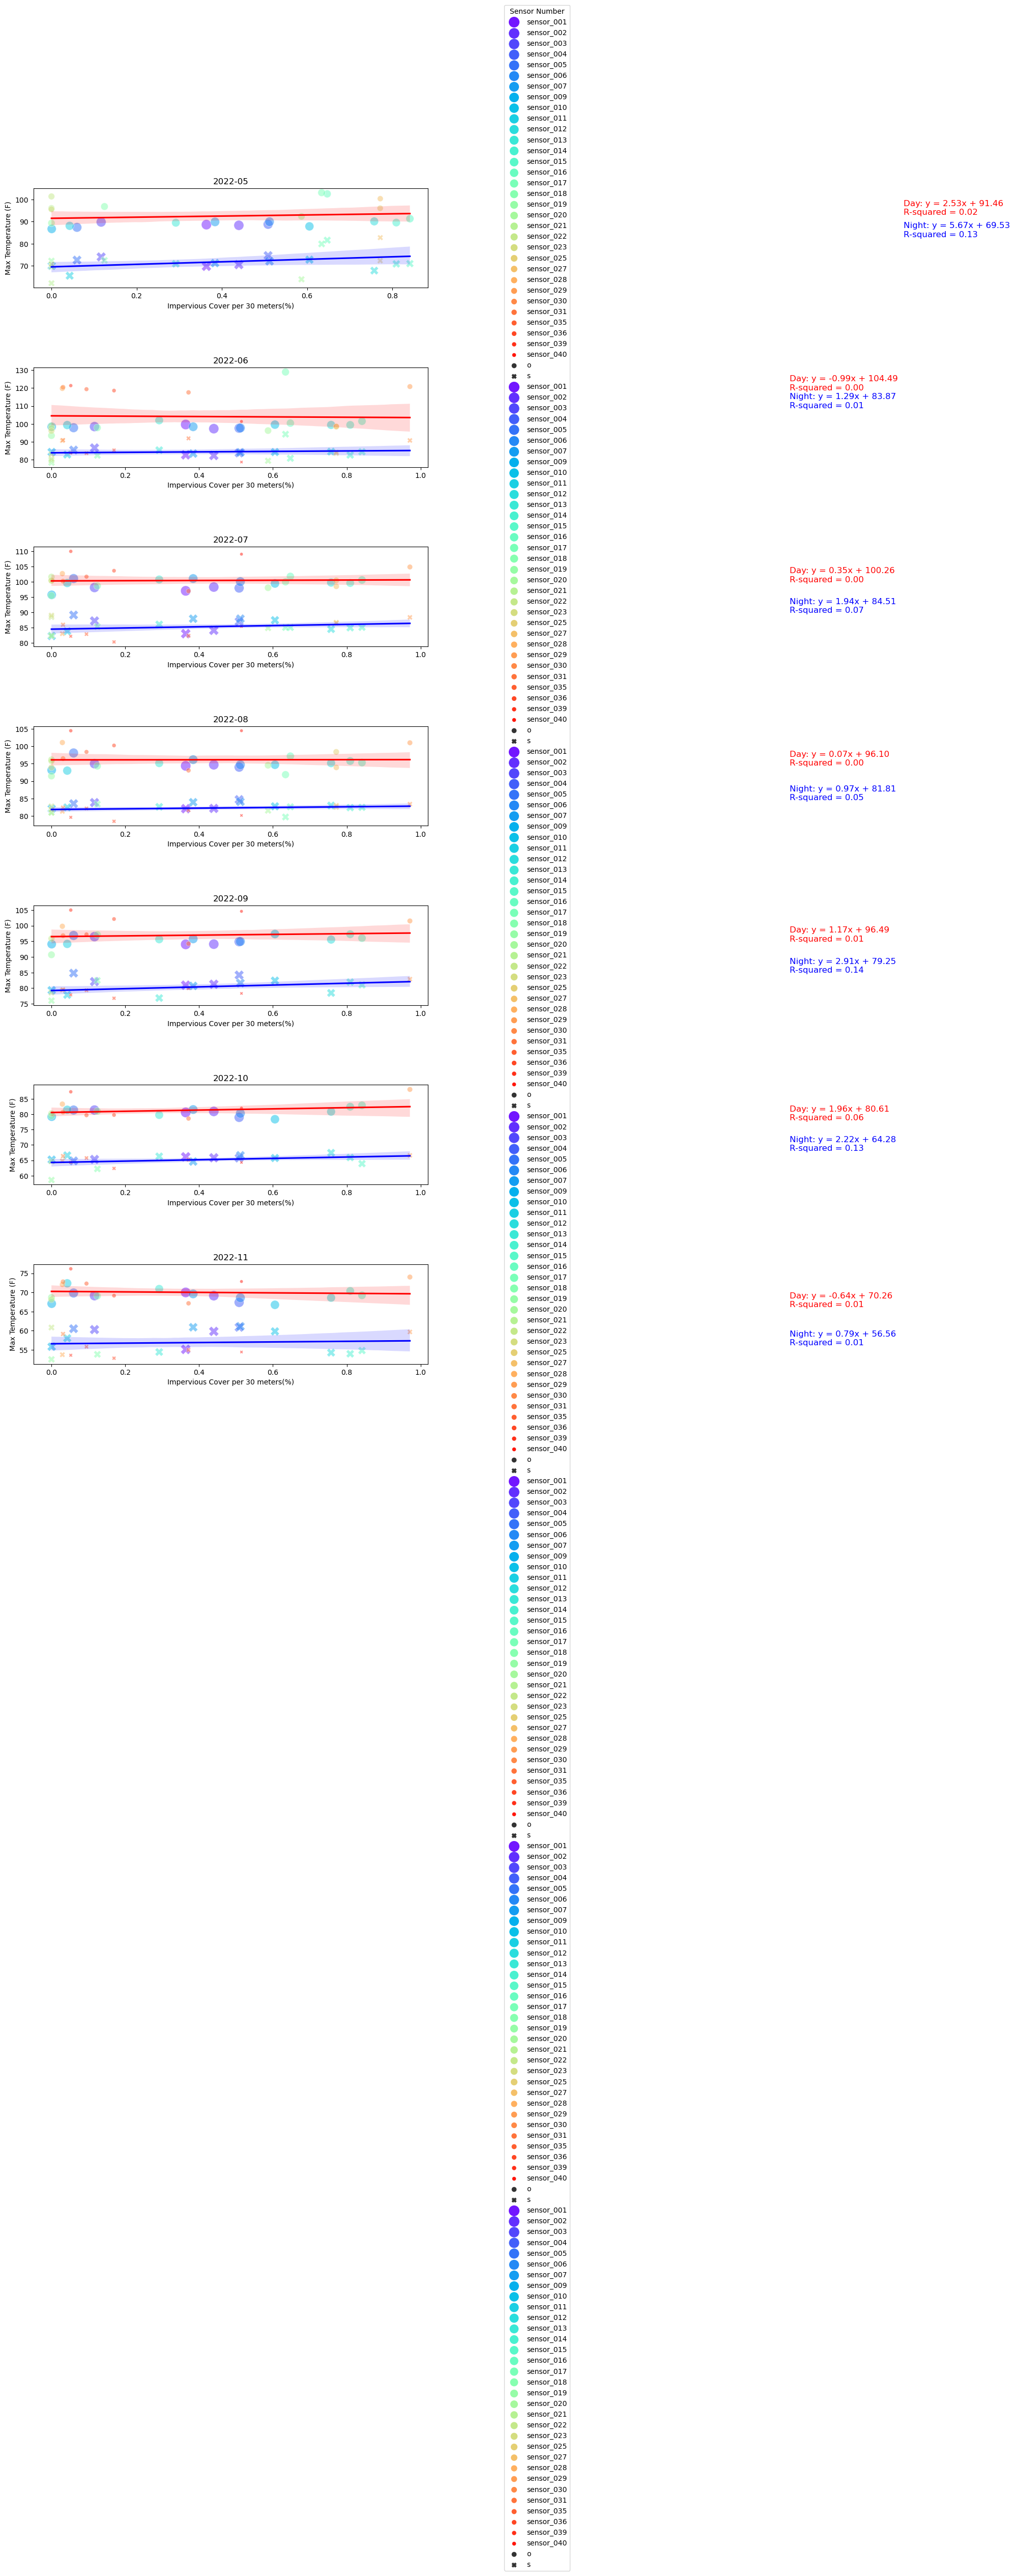

In [61]:
# Final ic max temperature per month
# calculate the fixed offset for the equation text
eq_offset = 4
# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# get a sorted unique list of all the sensor numbers
sensor_order = nightday_agg['sensor_number'].sort_values().unique()

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)

i = 0
for name, group in grouped:
    # assign different shapes for day and night data for each sensor
    markers = ['o' if time == 'Day' else 's' for time in group['Time of Day']]
    
    sns.scatterplot(x='ic_per_30',y=group.iloc[:, 10],hue='sensor_number',style=markers,data=group,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',hue_order=sensor_order,size='sensor_number',size_order=sensor_order,sizes=(20,200),ax=axs[i])
    
    # fit separate regression lines for day and night
    day_data = group[group['Time of Day'] == 'Day']
    night_data = group[group['Time of Day'] == 'Night']
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data['ic_per_30'], day_data.iloc[:, 10])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data['ic_per_30'], night_data.iloc[:, 10])
    sns.regplot(x='ic_per_30',y=day_data.iloc[:, 10],data=day_data,ax=axs[i],scatter=False,color='red')
    sns.regplot(x='ic_per_30',y=night_data.iloc[:, 10],data=night_data,ax=axs[i],scatter=False,color='blue')
    
    # add the regression equation and R-squared value to the plot
    eq_offset = 10.0
    axs[i].text(2, group.iloc[:, 10].max()-eq_offset, f'Day: y = {day_slope:.2f}x + {day_intercept:.2f}\nR-squared = {day_r_value**2:.2f}',
            fontsize=12, color='red')
    axs[i].text(2, group.iloc[:, 10].max()-eq_offset*2, f'Night: y = {night_slope:.2f}x + {night_intercept:.2f}\nR-squared = {night_r_value**2:.2f}',
            fontsize=12, color='blue')

    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Impervious Cover per 30 meters(%)')
    axs[i].set_ylabel('Max Temperature (F)')
    i += 1
       
fig.legend(title = "Sensor Number",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
#plt.savefig("legend.png", bbox_inches='tight')
plt.subplots_adjust(hspace=0.8)
plt.show()
#fig.savefig('FINALIC_monthlymax.pdf')

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_30737/3108601509.py:32: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(rect=[0, 0, 1.5, 1.5])


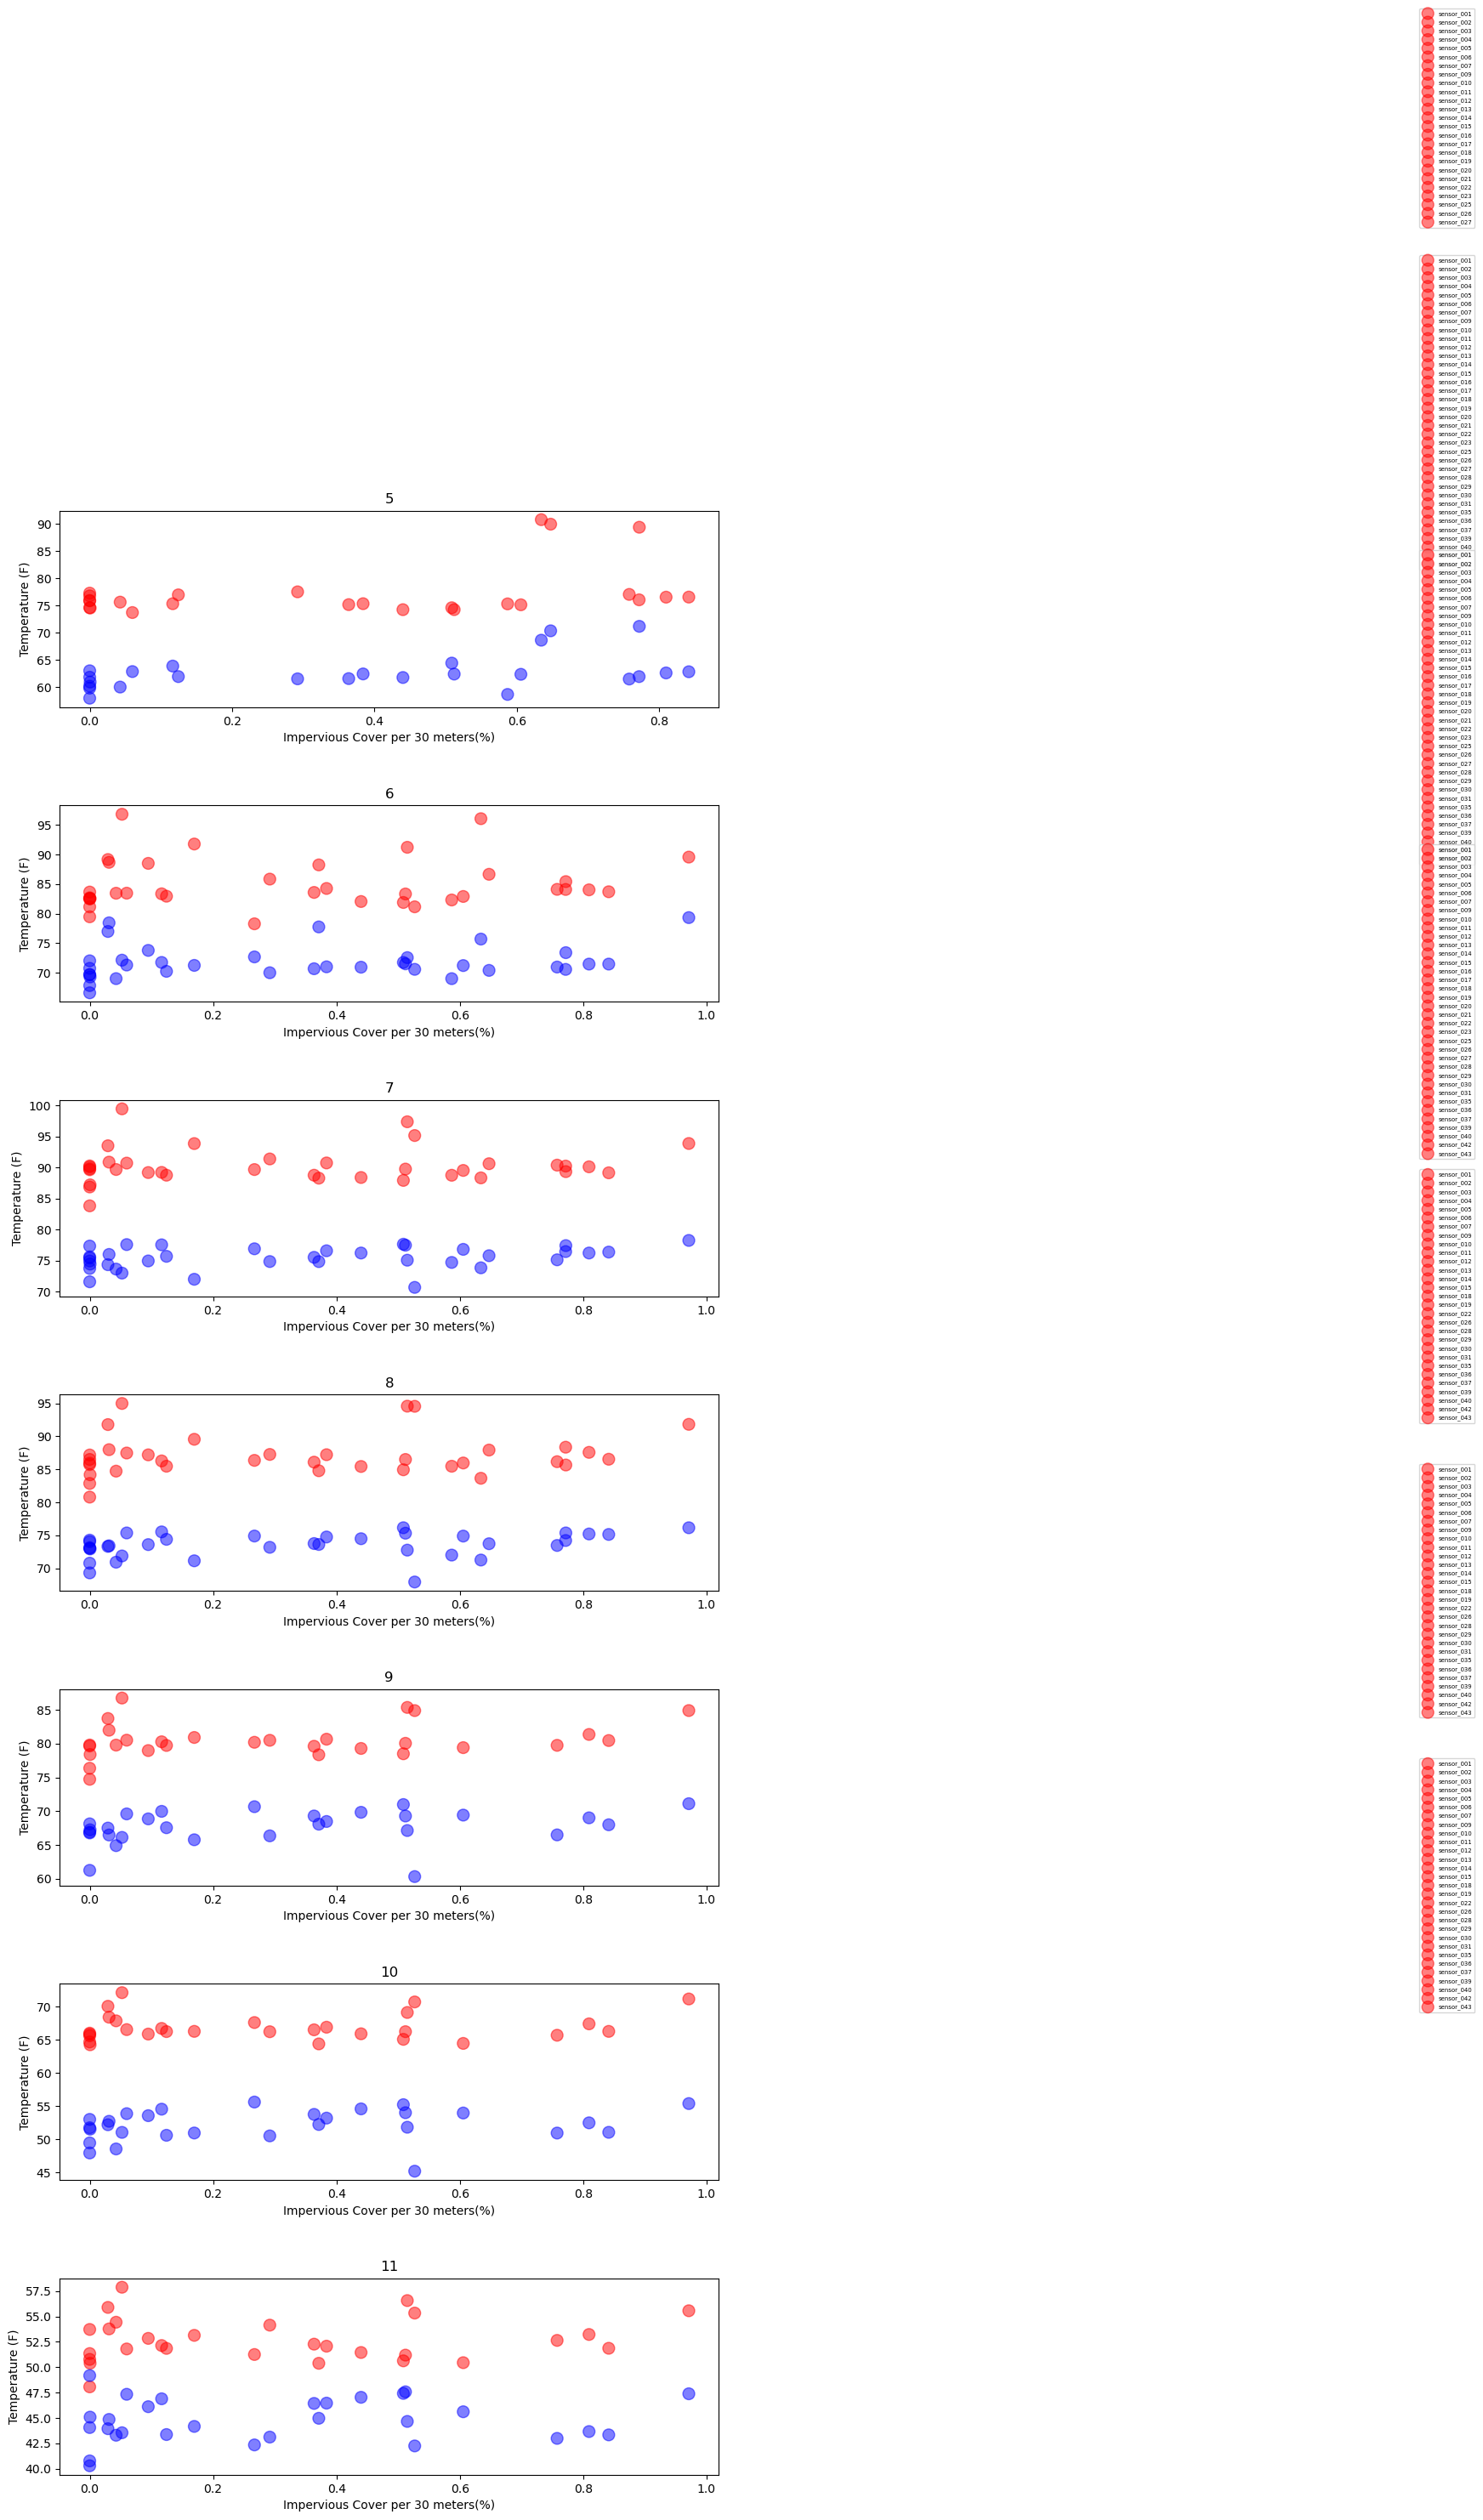

In [27]:
# Final ic daily max --> mean temperature per month
# group the dataframe by month
grouped = monthly_avg.groupby(['month'])

# get a sorted unique list of all the sensor numbers
sensor_order = monthly_avg['sensor_number'].sort_values().unique()

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

i = 0
for name, group in grouped:
    # create a pivot table with day and night temperatures as columns for each sensor
    pivot = group.pivot(index='sensor_number', columns='Time of Day', values='temp_fahrenheit')
    
    # assign different colors for day and night data for each sensor
    colors = {'Day': 'red', 'Night': 'blue'}
    
    # plot day and night temperatures for each sensor
    for sensor in sensor_order:
        if sensor in pivot.index:
            axs[i].scatter(x=group[group['sensor_number']==sensor]['ic_per_30'], y=pivot.loc[sensor], 
                           c=[colors[time] for time in pivot.columns], s=100, alpha=0.5, label=sensor)
    
    axs[i].set_title(name)
    axs[i].set_xlabel('Impervious Cover per 30 meters(%)')
    axs[i].set_ylabel('Temperature (F)')
    axs[i].legend(loc='center left', bbox_to_anchor=(2.05, 3.0), borderaxespad=1.5, fontsize=5)
    i += 1

fig.tight_layout(rect=[0, 0, 1.5, 1.5])
plt.show()

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_30737/836781165.py:65: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


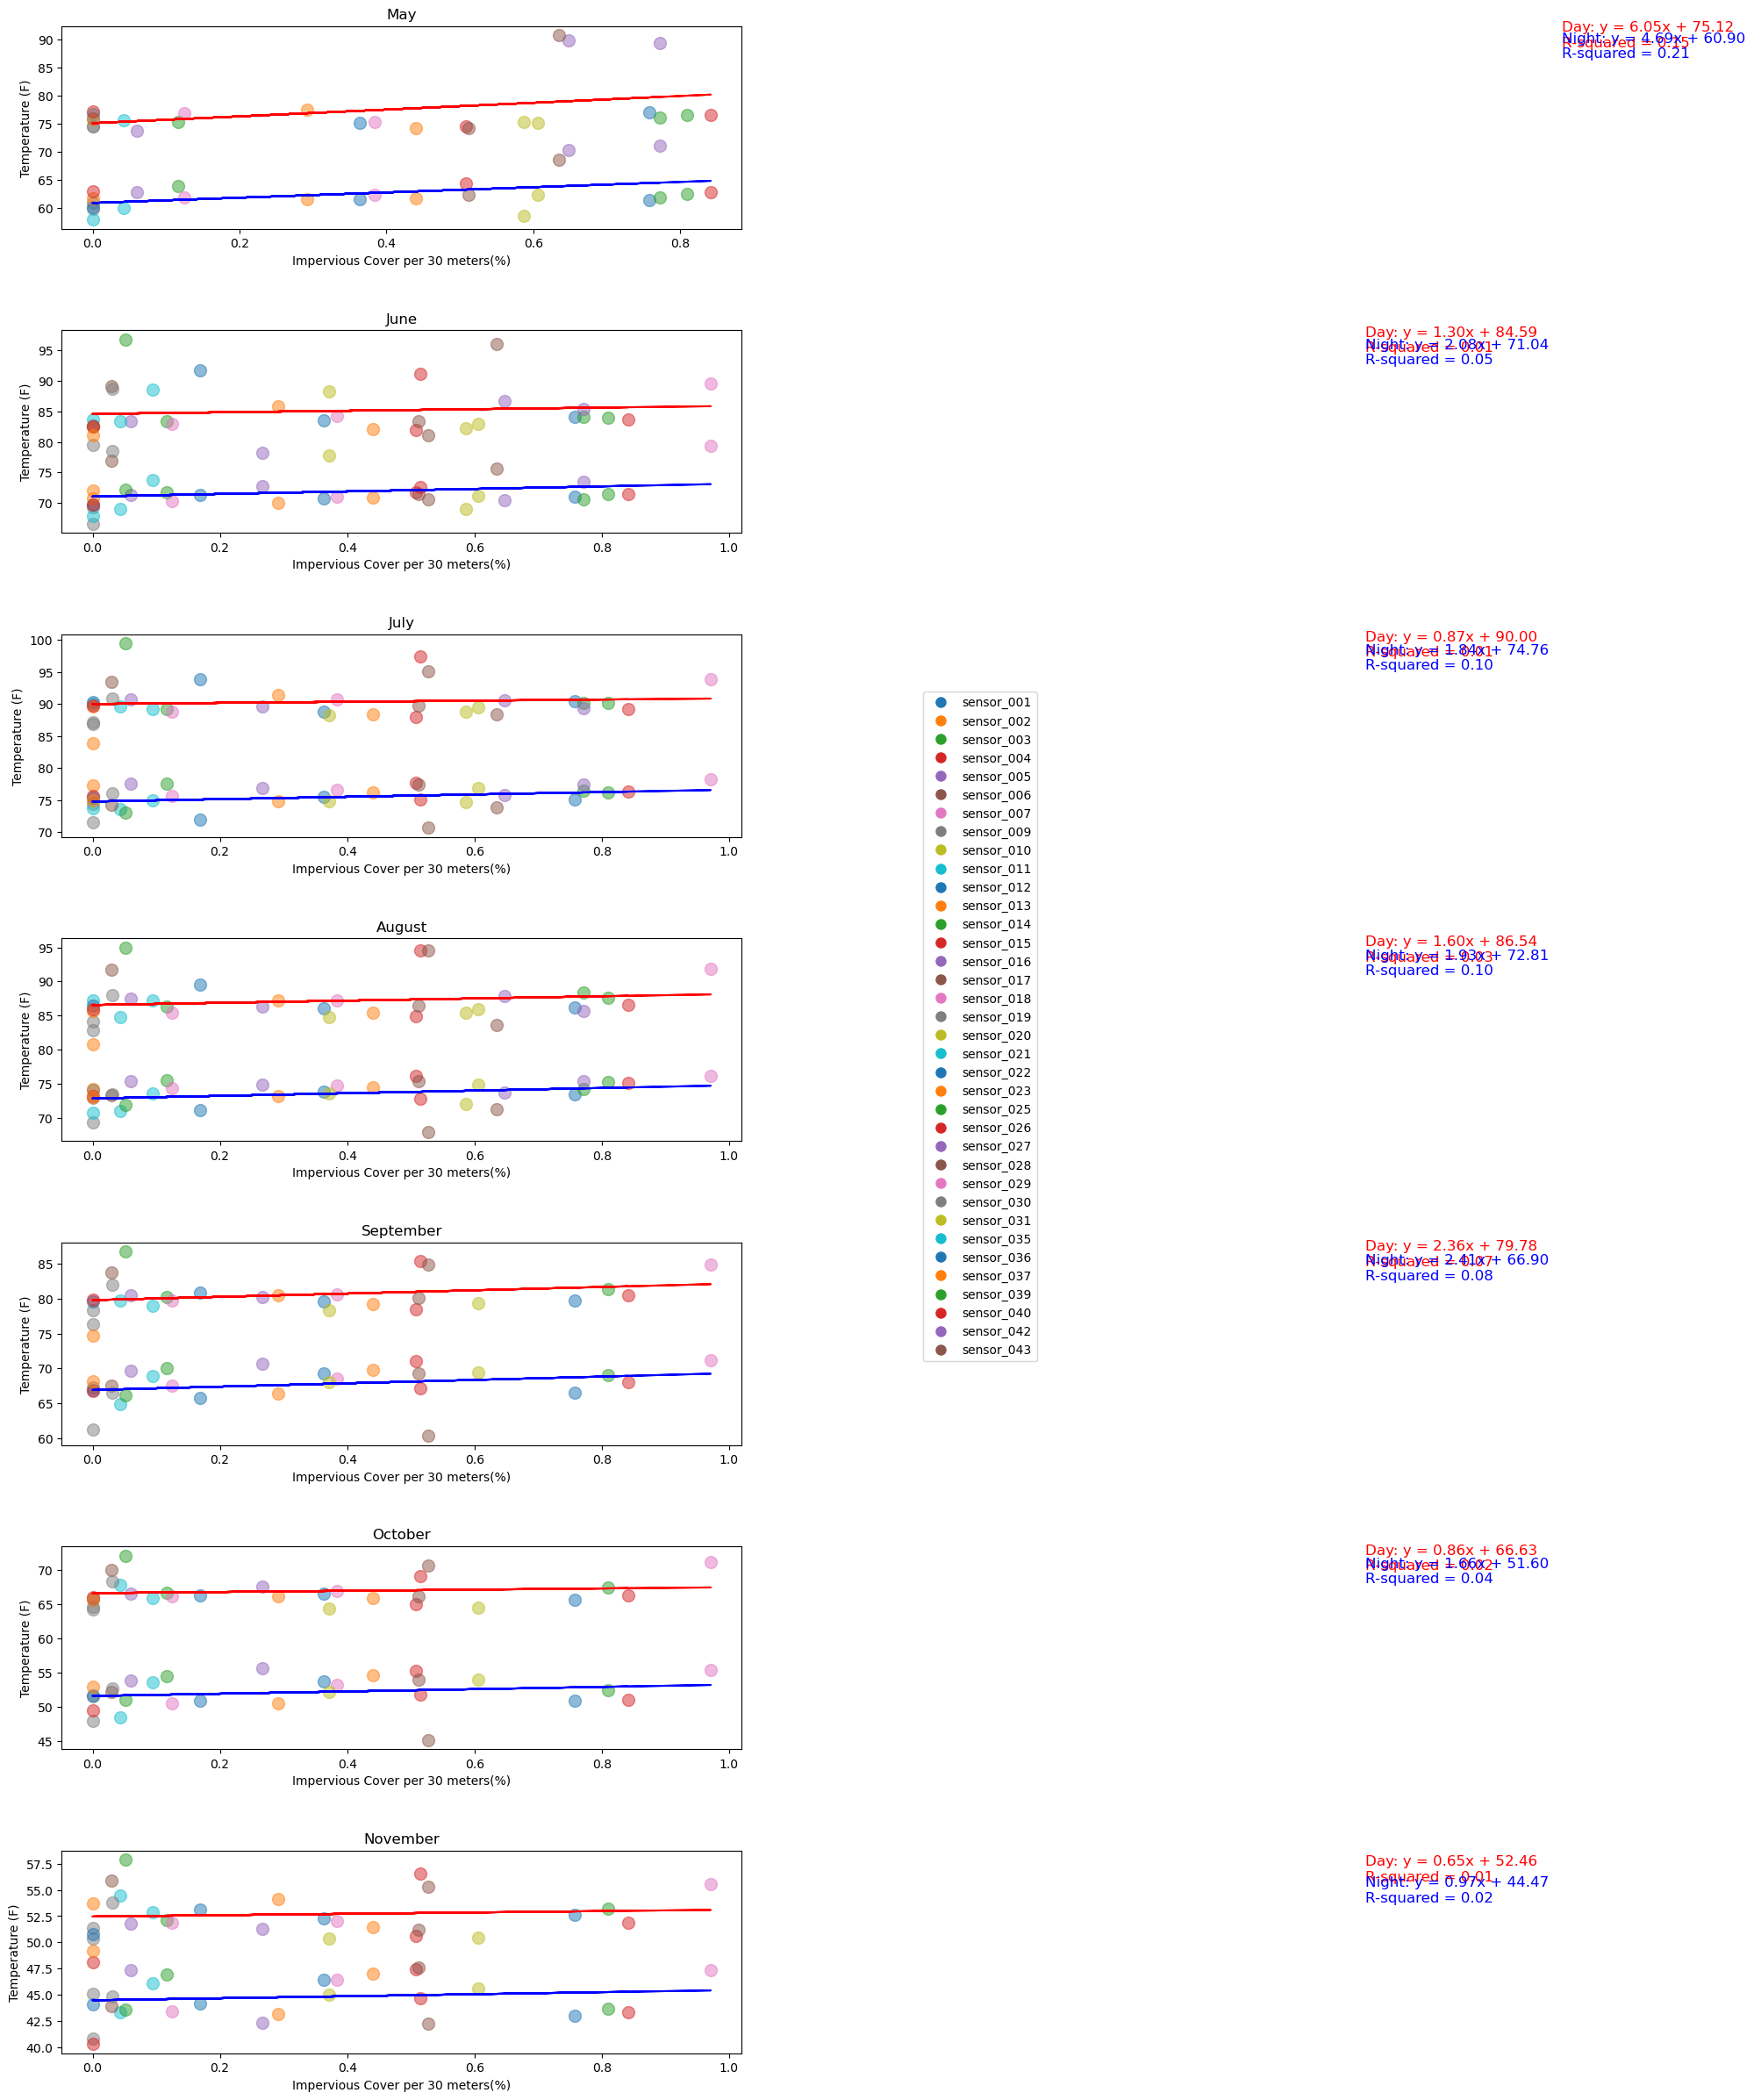

In [28]:
# Final ic daily max --> mean temperature per month
# create a dictionary mapping month numbers to their names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# group the dataframe by month
grouped = monthly_avg.groupby(['month'])

# get a sorted unique list of all the sensor numbers
sensor_order = monthly_avg['sensor_number'].sort_values().unique()

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# create a dictionary to map sensors to colors
color_map = {sensor: f'C{i}' for i, sensor in enumerate(sensor_order)}

i = 0
for name, group in grouped:
    # create a pivot table with day and night temperatures as columns for each sensor
    pivot = group.pivot(index='sensor_number', columns='Time of Day', values='temp_fahrenheit')
    
    # separate day and night temperatures
    x = group[group['Time of Day'] == 'Day']['ic_per_30']
    y_day = pivot['Day'].values.ravel()
    y_night = pivot['Night'].values.ravel()
    
    # fit separate regressions for day and night temperatures
    day_coef = np.polyfit(x, y_day, 1)
    night_coef = np.polyfit(x, y_night.ravel(), 1)
    
     # calculate R-squared for day and night regressions
    day_r2 = r2_score(y_day, np.polyval(day_coef, x))
    night_r2 = r2_score(y_night, np.polyval(night_coef, x))
    
    # plot the regressions
    axs[i].plot(x, np.polyval(day_coef, x), color='red', label='Day regression')
    axs[i].plot(x, np.polyval(night_coef, x), color='blue', label='Night regression')
    
    # add the regression equation and R-squared value to the plot
    eq_offset = 40
    axs[i].text(2, pivot.max().max()-2, f'Day: y = {day_coef[0]:.2f}x + {day_coef[1]:.2f}\nR-squared = {day_r2:.2f}', fontsize=12, color='red')
    axs[i].text(2, pivot.max().max()-4, f'Night: y = {night_coef[0]:.2f}x + {night_coef[1]:.2f}\nR-squared = {night_r2:.2f}', fontsize=12, color='blue')
   
    
    # plot day and night temperatures for each sensor
    for sensor in sensor_order:
        if sensor in pivot.index:
            axs[i].scatter(x=group[group['sensor_number']==sensor]['ic_per_30'], y=pivot.loc[sensor], 
                           c=color_map[sensor], s=100, alpha=0.5, label=sensor)
            
    axs[i].set_title(month_names[name])  # set the title using the month names
    axs[i].set_xlabel('Impervious Cover per 30 meters(%)')
    axs[i].set_ylabel('Temperature (F)')
    axs[i].legend().set_visible(False)  # remove legend for the subplot
    i += 1
    
# create a custom legend
legend_handles = []
for sensor in sensor_order:
    legend_handles.append(Line2D([0], [0], marker='o', color='w', label=sensor, markerfacecolor=color_map[sensor], markersize=10))
    
fig.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.tight_layout()
plt.show()


/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.

/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_30737/249846938.py:54: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


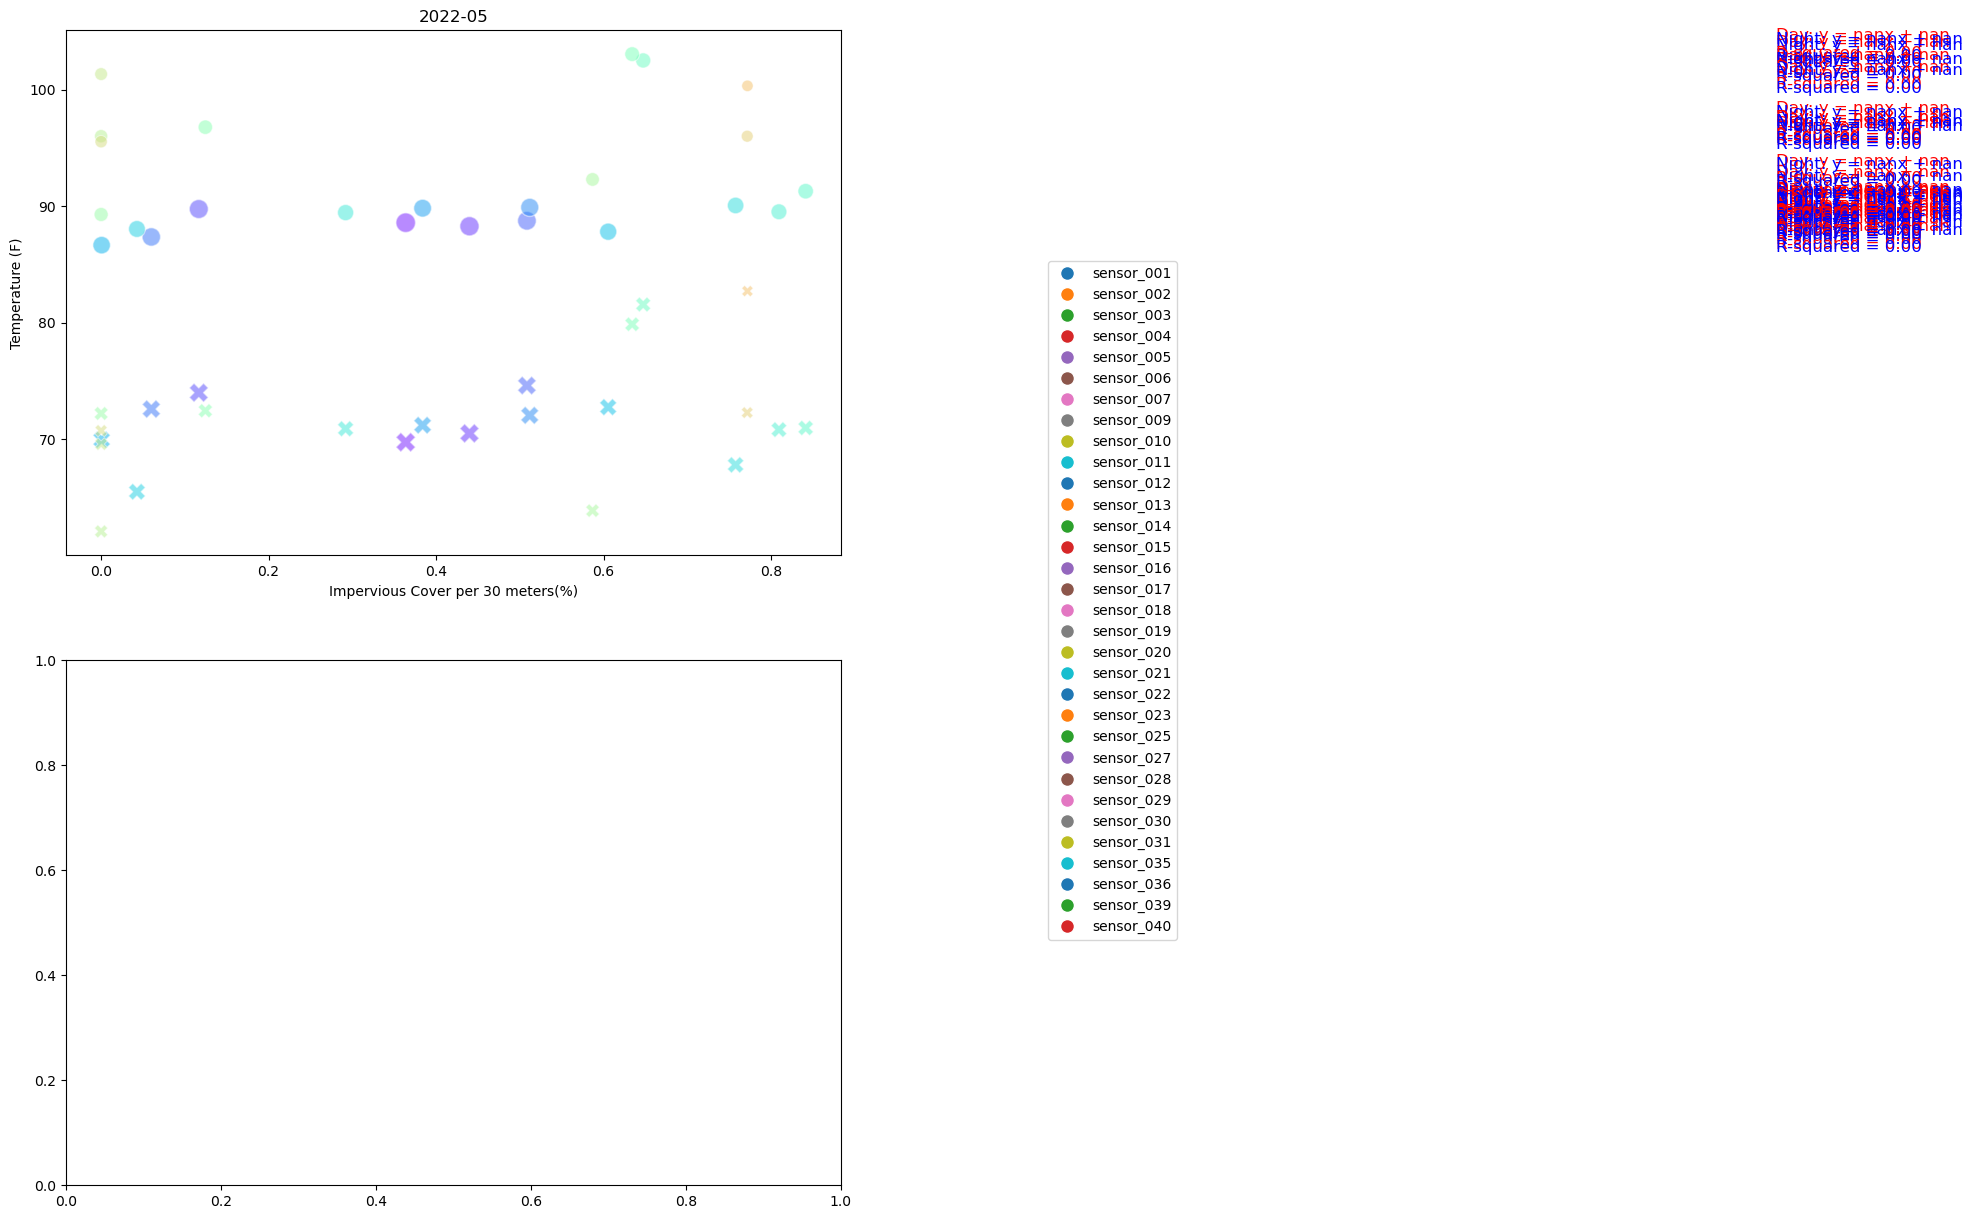

/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.

/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.

/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.

IndexError: index 2 is out of bounds for axis 0 with size 2

In [29]:
# Two plots to reduce scale - ic 
nightday_agg['sensor_number_numeric'] = nightday_agg['sensor_number'].str.slice(start=7).astype(int)
# create two separate dataframes for sensors below and above 100
df_below_100 = nightday_agg[nightday_agg['sensor_number_numeric'] < 100]
df_above_100 = nightday_agg[nightday_agg['sensor_number_numeric'] >= 100]

# calculate the fixed offset for the equation text
eq_offset = 0.3

# group each dataframe by month
grouped_below_100 = df_below_100.groupby(['month'])
grouped_above_100 = df_above_100.groupby(['month'])

# create two subplots, one for sensors below 100 and one for sensors above 100
fig, axs = plt.subplots(nrows=2, figsize=(10,15))

# set the order for the sensors
sensor_order = nightday_agg['sensor_number'].sort_values().unique()

# loop through each group in the below 100 dataframe
i = 0
for name, group in grouped_below_100:
    # create a scatterplot for each sensor in the group
    for sensor_num in group['sensor_number'].unique():
        sensor_data = group[group['sensor_number'] == sensor_num]
        markers = ['o' if time == 'Day' else 's' for time in sensor_data['Time of Day']]
        sns.scatterplot(x='ic_per_30', y=sensor_data.iloc[:, 10], hue='sensor_number', style=markers, data=sensor_data, x_jitter=True, y_jitter=True, alpha=0.5, palette='rainbow', hue_order=sensor_order, size='sensor_number', size_order=sensor_order, sizes=(20, 200), ax=axs[i])
        
        # fit separate regression lines for day and night
        day_data = sensor_data[sensor_data['Time of Day'] == 'Day']
        night_data = sensor_data[sensor_data['Time of Day'] == 'Night']
        day_slope, day_intercept, day_r_value, _, _ = linregress(day_data['ic_per_30'], day_data.iloc[:, 10])
        night_slope, night_intercept, night_r_value, _, _ = linregress(night_data['ic_per_30'], night_data.iloc[:, 10])
        sns.regplot(x='ic_per_30', y=day_data.iloc[:, 10], data=day_data, ax=axs[i], scatter=False, color='red')
        sns.regplot(x='ic_per_30', y=night_data.iloc[:, 10], data=night_data, ax=axs[i], scatter=False, color='blue')
        
        # add the regression equation and R-squared value to the plot
        axs[i].text(2, sensor_data.iloc[:, 10].max()-eq_offset, f'Day: y = {day_slope:.2f}x + {day_intercept:.2f}\nR-squared = {day_r_value**2:.2f}', fontsize=12, color='red')
        axs[i].text(2, sensor_data.iloc[:, 10].max()-eq_offset*2, f'Night: y = {night_slope:.2f}x + {night_intercept:.2f}\nR-squared = {night_r_value**2:.2f}', fontsize=12, color='blue')

    axs[i].set_title(name)
    axs[i].set_xlabel('Impervious Cover per 30 meters(%)')
    axs[i].set_ylabel('Temperature (F)')
    axs[i].legend().set_visible(False)  # remove legend for the subplot
    i += 1

    # create a custom legend
    legend_handles = []
    for sensor in sensor_order:
        legend_handles.append(Line2D([0], [0], marker='o', color='w', label=sensor, markerfacecolor=color_map[sensor], markersize=10))

    fig.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1.1, 0.5))

    fig.tight_layout()
    plt.show()


In [ ]:
# Reduce the points so that they are below 110 degrees - ic
# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# get a sorted unique list of all the sensor numbers
sensor_order = nightday_agg['sensor_number'].sort_values().unique()

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))

i = 0
for name, group in grouped:
    # filter the data to only include values below 110 degrees
    filtered_data = group[group.iloc[:, 10] < 110]
    
    # assign different shapes for day and night data for each sensor
    markers = ['o' if time == 'Day' else 's' for time in filtered_data['Time of Day']]
    
    sns.scatterplot(x='ic_per_30',y=filtered_data.iloc[:, 10],hue='sensor_number',style=markers,data=filtered_data,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',hue_order=sensor_order,size='sensor_number',size_order=sensor_order,sizes=(20,200),ax=axs[i])
    
    # fit separate regression lines for day and night
    day_data = filtered_data[filtered_data['Time of Day'] == 'Day']
    night_data = filtered_data[filtered_data['Time of Day'] == 'Night']
    sns.regplot(x='ic_per_30',y=day_data.iloc[:, 10],data=day_data,ax=axs[i],scatter=False,color='red')
    sns.regplot(x='ic_per_30',y=night_data.iloc[:, 10],data=night_data,ax=axs[i],scatter=False,color='blue')
    
    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Impervious Cover per 30 meters(%)')
    axs[i].set_ylabel('Max Temperature (F)')
    i += 1

fig.legend(title = "Sensor Number",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
#plt.savefig("legend.png", bbox_inches='tight')
plt.subplots_adjust(hspace=0.8)
plt.show()
#fig.savefig('cc_dn_seperateregressions_shapes.pdf')

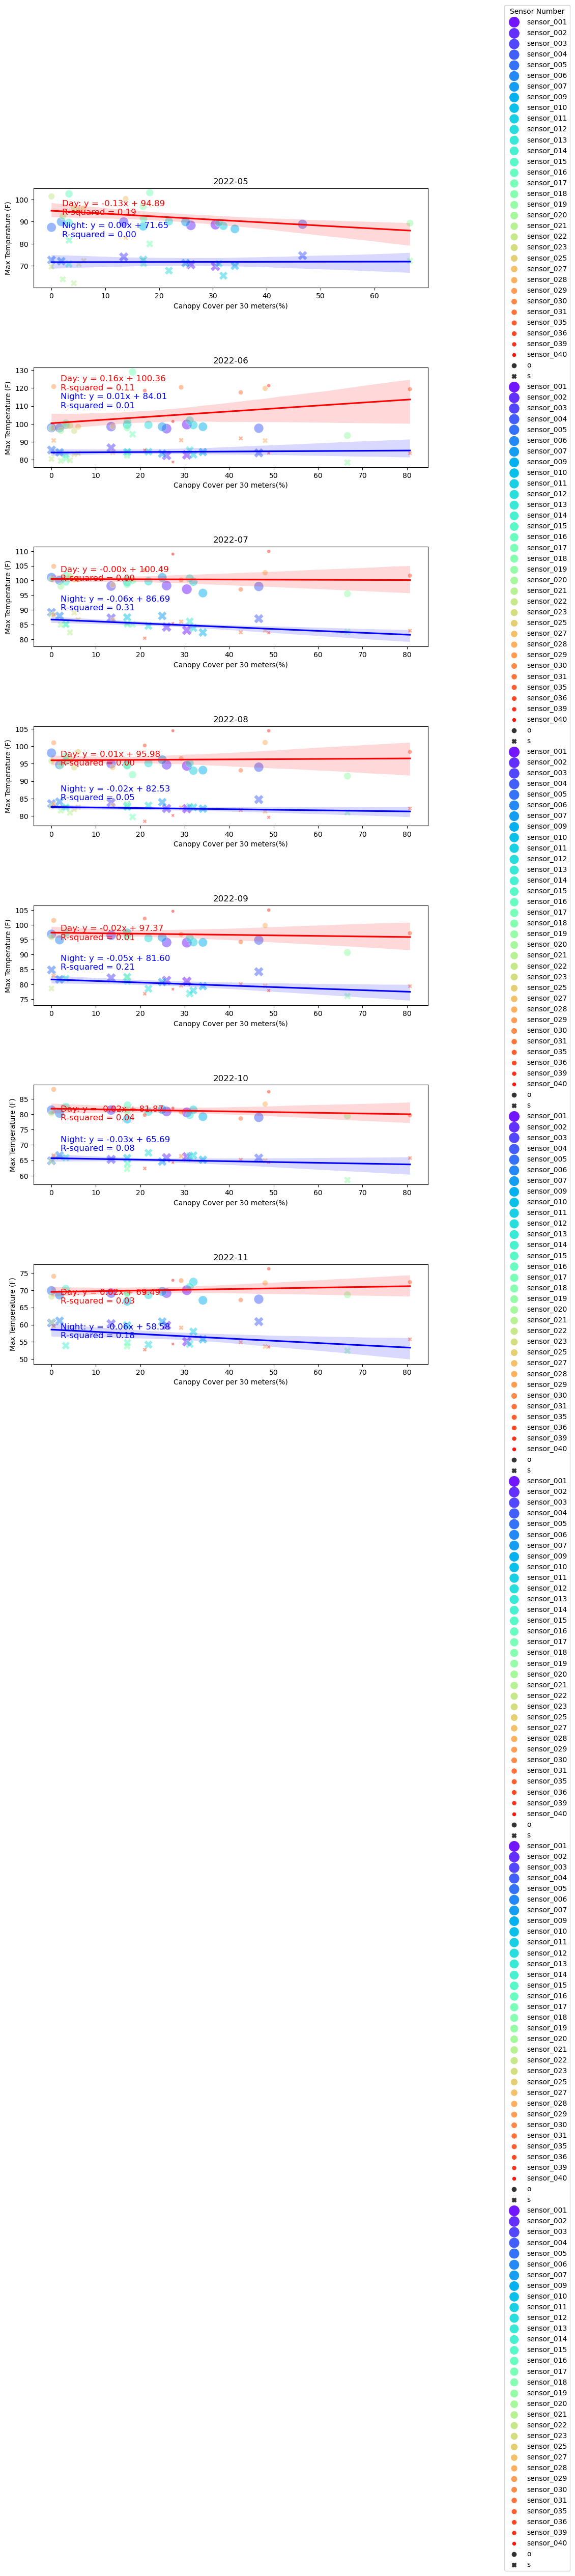

In [60]:
# Final cc 30 meters max temperature per month
# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# get a sorted unique list of all the sensor numbers
sensor_order = nightday_agg['sensor_number'].sort_values().unique()

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))

i = 0
for name, group in grouped:
    # assign different shapes for day and night data for each sensor
    markers = ['o' if time == 'Day' else 's' for time in group['Time of Day']]
    
    sns.scatterplot(x='cc_per_30',y=group.iloc[:, 10],hue='sensor_number',style=markers,data=group,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',hue_order=sensor_order,size='sensor_number',size_order=sensor_order,sizes=(20,200),ax=axs[i])
    
    # fit separate regression lines for day and night
    day_data = group[group['Time of Day'] == 'Day']
    night_data = group[group['Time of Day'] == 'Night']
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data['cc_per_30'], day_data.iloc[:, 10])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data['cc_per_30'], night_data.iloc[:, 10])
    sns.regplot(x='cc_per_30',y=day_data.iloc[:, 10],data=day_data,ax=axs[i],scatter=False,color='red')
    sns.regplot(x='cc_per_30',y=night_data.iloc[:, 10],data=night_data,ax=axs[i],scatter=False,color='blue')
    
    # add the regression equation and R-squared value to the plot
    eq_offset = 10.0
    axs[i].text(2, group.iloc[:, 10].max()-eq_offset, f'Day: y = {day_slope:.2f}x + {day_intercept:.2f}\nR-squared = {day_r_value**2:.2f}',
            fontsize=12, color='red')
    axs[i].text(2, group.iloc[:, 10].max()-eq_offset*2, f'Night: y = {night_slope:.2f}x + {night_intercept:.2f}\nR-squared = {night_r_value**2:.2f}',
            fontsize=12, color='blue')

    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Canopy Cover per 30 meters(%)')
    axs[i].set_ylabel('Max Temperature (F)')
    i += 1

fig.legend(title = "Sensor Number",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
#plt.savefig("legend.png", bbox_inches='tight')
plt.subplots_adjust(hspace=0.8)
plt.show()
#fig.savefig('FINALCC_monthlymax.pdf')

In [ ]:
# Final cc daily max --> mean temperature per month
# create a dictionary mapping month numbers to their names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# group the dataframe by month
grouped = monthly_avg.groupby(['month'])

# get a sorted unique list of all the sensor numbers
sensor_order = monthly_avg['sensor_number'].sort_values().unique()

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# create a dictionary to map sensors to colors
color_map = {sensor: f'C{i}' for i, sensor in enumerate(sensor_order)}

i = 0
for name, group in grouped:
    # create a pivot table with day and night temperatures as columns for each sensor
    pivot = group.pivot(index='sensor_number', columns='Time of Day', values='temp_fahrenheit')
    
    # separate day and night temperatures
    x = group[group['Time of Day'] == 'Day']['cc_per_30']
    y_day = pivot['Day'].values.ravel()
    y_night = pivot['Night'].values.ravel()
    
    # fit separate regressions for day and night temperatures
    day_coef = np.polyfit(x, y_day, 1)
    night_coef = np.polyfit(x, y_night.ravel(), 1)
    
    # plot the regressions
    axs[i].plot(x, np.polyval(day_coef, x), color='red', label='Day regression')
    axs[i].plot(x, np.polyval(night_coef, x), color='blue', label='Night regression')
    
    # plot day and night temperatures for each sensor
    for sensor in sensor_order:
        if sensor in pivot.index:
            axs[i].scatter(x=group[group['sensor_number']==sensor]['cc_per_30'], y=pivot.loc[sensor], 
                           c=color_map[sensor], s=100, alpha=0.5, label=sensor)
            
    axs[i].set_title(month_names[name])  # set the title using the month names
    axs[i].set_xlabel('Canopy Cover per 30 meters(%)')
    axs[i].set_ylabel('Temperature (F)')
    axs[i].legend().set_visible(False)  # remove legend for the subplot
    i += 1
    
# create a custom legend
legend_handles = []
for sensor in sensor_order:
    legend_handles.append(Line2D([0], [0], marker='o', color='w', label=sensor, markerfacecolor=color_map[sensor], markersize=10))
    
fig.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.tight_layout()
plt.show()


In [ ]:
# Reduce the points so that they are below 110 degrees - cc per 30 
# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# get a sorted unique list of all the sensor numbers
sensor_order = nightday_agg['sensor_number'].sort_values().unique()

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))

i = 0
for name, group in grouped:
    # filter the data to only include values below 110 degrees
    filtered_data = group[group.iloc[:, 10] < 110]
    
    # assign different shapes for day and night data for each sensor
    markers = ['o' if time == 'Day' else 's' for time in filtered_data['Time of Day']]
    
    sns.scatterplot(x='cc_per_30',y=filtered_data.iloc[:, 10],hue='sensor_number',style=markers,data=filtered_data,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',hue_order=sensor_order,size='sensor_number',size_order=sensor_order,sizes=(20,200),ax=axs[i])
    
    # fit separate regression lines for day and night
    day_data = filtered_data[filtered_data['Time of Day'] == 'Day']
    night_data = filtered_data[filtered_data['Time of Day'] == 'Night']
    sns.regplot(x='cc_per_30',y=day_data.iloc[:, 10],data=day_data,ax=axs[i],scatter=False,color='red')
    sns.regplot(x='cc_per_30',y=night_data.iloc[:, 10],data=night_data,ax=axs[i],scatter=False,color='blue')
    
    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Canopy Cover per 30 meters(%)')
    axs[i].set_ylabel('Max Temperature (F)')
    i += 1

fig.legend(title = "Sensor Number",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
#plt.savefig("legend.png", bbox_inches='tight')
plt.subplots_adjust(hspace=0.8)
plt.show()
#fig.savefig('cc_dn_seperateregressions_shapes.pdf')



In [ ]:
# Final cc 30 densiometer max temperature per month
# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# get a sorted unique list of all the sensor numbers
sensor_order = nightday_agg['sensor_number'].sort_values().unique()

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))

i = 0
for name, group in grouped:
    # assign different shapes for day and night data for each sensor
    markers = ['o' if time == 'Day' else 's' for time in group['Time of Day']]
    
    sns.scatterplot(x='cc_per_densi',y=group.iloc[:, 10],hue='sensor_number',style=markers,data=group,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',hue_order=sensor_order,size='sensor_number',size_order=sensor_order,sizes=(20,200),ax=axs[i])
    
    # fit separate regression lines for day and night
    day_data = group[group['Time of Day'] == 'Day']
    night_data = group[group['Time of Day'] == 'Night']
    sns.regplot(x='cc_per_densi',y=day_data.iloc[:, 10],data=day_data,ax=axs[i],scatter=False,color='red')
    sns.regplot(x='cc_per_densi',y=night_data.iloc[:, 10],data=night_data,ax=axs[i],scatter=False,color='blue')
    
    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Canopy Cover per densiometer(%)')
    axs[i].set_ylabel('Max Temperature (F)')
    i += 1

fig.legend(title = "Sensor Number",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
#plt.savefig("legend.png", bbox_inches='tight')
plt.subplots_adjust(hspace=0.8)
plt.show()
#fig.savefig('ic_dn_seperateregressions_shapes.pdf')

In [ ]:
# Change column names for plots i.e. max/min
nightday_agg.columns = ['index', 'sensor_number', 'Time of Day', 'month', 'ic_per_30', 'LULC','cc_per_densi', 'cc_per_30', 'mean', 'min', 'max', 'cc_per_30m', 'ic_per_30m']
nightday_agg.head()

In [ ]:
# Temperature diffence night/day canopy cover
# Create a color map for the sensors
sensor_colors = {s: c for s, c in zip(nightday_agg['sensor_number'].unique(), np.linspace(0, 1, len(nightday_agg['sensor_number'].unique())))}
cmap = plt.get_cmap("hsv")

# Group the data by month and sensor number
for m in nightday_agg['month'].unique():
    month_data = nightday_agg[nightday_agg['month'] == m]
    for sensor in month_data['sensor_number'].unique():
        sensor_data = month_data[month_data['sensor_number'] == sensor]
        
        # Extract maximum temperatures for both day and night
        max_day_temp = sensor_data[sensor_data['Time of Day'] == 'Day']['max'].max()
        max_night_temp = sensor_data[sensor_data['Time of Day'] == 'Night']['max'].max()
        
        # Subtract the maximum temperatures
        y = max_day_temp - max_night_temp
        
        # Plot the result
        x = sensor_data['cc_per_30'].iloc[0] # Use the assigned value for the x-axis
        color = cmap(sensor_colors[sensor])
        plt.scatter(x, y, c=color, label=sensor)
    
    plt.title(str(m))
    plt.xlabel('Canopy Cover')
    plt.ylabel('Difference in Maximum Temperatures (Day - Night)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


In [ ]:
# Create a color map for the sensors
sensor_colors = {s: c for s, c in zip(nightday_agg['sensor_number'].unique(), np.linspace(0, 1, len(nightday_agg['sensor_number'].unique())))}
cmap = plt.get_cmap("hsv")

# Group the data by month and sensor number
for m in nightday_agg['month'].unique():
    month_data = nightday_agg[nightday_agg['month'] == m]
    for sensor in month_data['sensor_number'].unique():
        sensor_data = month_data[month_data['sensor_number'] == sensor]
        
        # Extract maximum temperatures for both day and night
        max_day_temp = sensor_data[sensor_data['Time of Day'] == 'Day']['max'].max()
        max_night_temp = sensor_data[sensor_data['Time of Day'] == 'Night']['max'].max()
        
        # Subtract the maximum temperatures
        y = max_day_temp - max_night_temp
        
        # Plot the result
        x = sensor_data['cc_per_30'].iloc[0] # Use the assigned value for the x-axis
        color = cmap(sensor_colors[sensor])
        plt.scatter(x, y, c=color, label=sensor)
        
    plt.title(str(m))
    plt.xlabel('Canopy Cover')
    plt.ylabel('Difference in Maximum Temperatures (Day - Night)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.savefig(f"{m}.pdf")
    #plt.savefig("legend_difference.png", bbox_inches='tight')
    plt.show()
